<a href="https://colab.research.google.com/github/Sonali-Kotni57/Deep-Learning-Lab/blob/main/Experiment_8_Neural_Network_For_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**8. Build a neural network for clustering**

###**1. Problem statement:**  

The marketing team lauch a targeted ad marketing campaign by dividing their customers into at least 3 groups
marketing is crucial for the growth and sustainability of any business
one key pain point is to know their customers and identify their needs

###**2. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

###**3. EDA**

In [2]:
creditcard_df = pd.read_csv('/content/sample_data/Marketing_data.csv')

**3.1 Data distribution review**  

Column definition
Custid: Identification Of Credit Card Holder
Balance: Balance Amount Left In Customer's Account To Make Purchases
Balance_Frequency: How Frequently The Balance Is Updated, Score Between 0 And 1 (1 = Frequently Updated, 0 = Not Frequently Updated)
Purchases: Amount Of Purchases Made From Account
Oneoffpurchases: Maximum Purchase Amount Done In One-Go
Installments_Purchases: Amount Of Purchase Done In Installment
Cash_Advance: Cash In Advance Given By The User
Purchases_Frequency: How Frequently The Purchases Are Being Made, Score Between 0 And 1 (1 = Frequently Purchased, 0 = Not Frequently Purchased)
Oneoff_Purchases_Frequency: How Frequently Purchases Are Happening In One-Go (1 = Frequently Purchased, 0 = Not Frequently Purchased)
Purchases_Installments_Frequency: How Frequently Purchases In Installments Are Being Done (1 = Frequently Done, 0 = Not Frequently Done)
Cash_Advance_Frequency: How Frequently The Cash In Advance Being Paid
Cash_Advance_Trx: Number Of Transactions Made With "Cash In Advance"
Purchases_Trx: Number Of Purchase Transactions Made
Credit_Limit: Limit Of Credit Card For User
Payments: Amount Of Payment Done By User
Minimum_Payments: Minimum Amount Of Payments Made By User
Prc_Full_Payment: Percent Of Full Payment Paid By User
Tenure: Tenure Of Credit Card Service For User

In [3]:
creditcard_df.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [4]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

extreme client on cash advance and one-off purchase

In [5]:
creditcard_df[ creditcard_df['CASH_ADVANCE'] > 47137.21176]

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
2159  C12226  10905.05381  ...               0.0      12

[1 rows x 18 columns]

In [6]:
creditcard_df[ creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
550  C10574  11547.52001  ...              0.25      12

[1 rows x 18 columns]

**3.2 Data quality review**

In [7]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
creditcard_df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

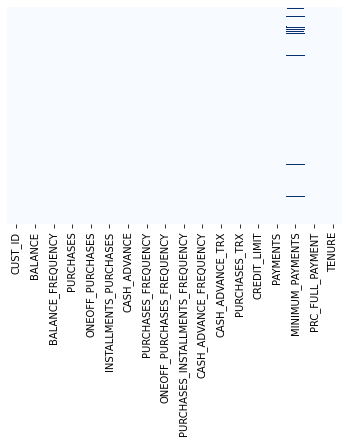

In [9]:
sns.heatmap(creditcard_df.isna(), yticklabels=False, cbar = False, cmap = 'Blues')

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**3.3 Fill missing values with mean**

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditcard_df.duplicated().sum()

0

**3.4 Drop meaningless column**

In [15]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [16]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]

In [17]:
n = len(creditcard_df.columns)
n

17

In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**3.5 Variable distribution**  

distplot combines matplotlib.hist function with seaborn kdeplot()  
KDE plot represents the Kernel Density Estimate  
KDE is used for visualizing the probability density of a continuous variable.  
KDE demonstrates the probability density at different values in a continous variable.  

**Interesting findings:**  

For 'Balance', most customers are around 1500  
For 'Balance Frequency', most customers are near 1, indicating they makes purchase frequently  
For 'Purchases Fruqnecy', there are 2 distinct groups of customers, one purchases least often, the other frequently  
For 'Prc_Full_payment', most customer pay 0 to 0.2  
For 'Tenure', most customers are ~11 years tenure  
For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently  
Credit limit average is around $4500  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

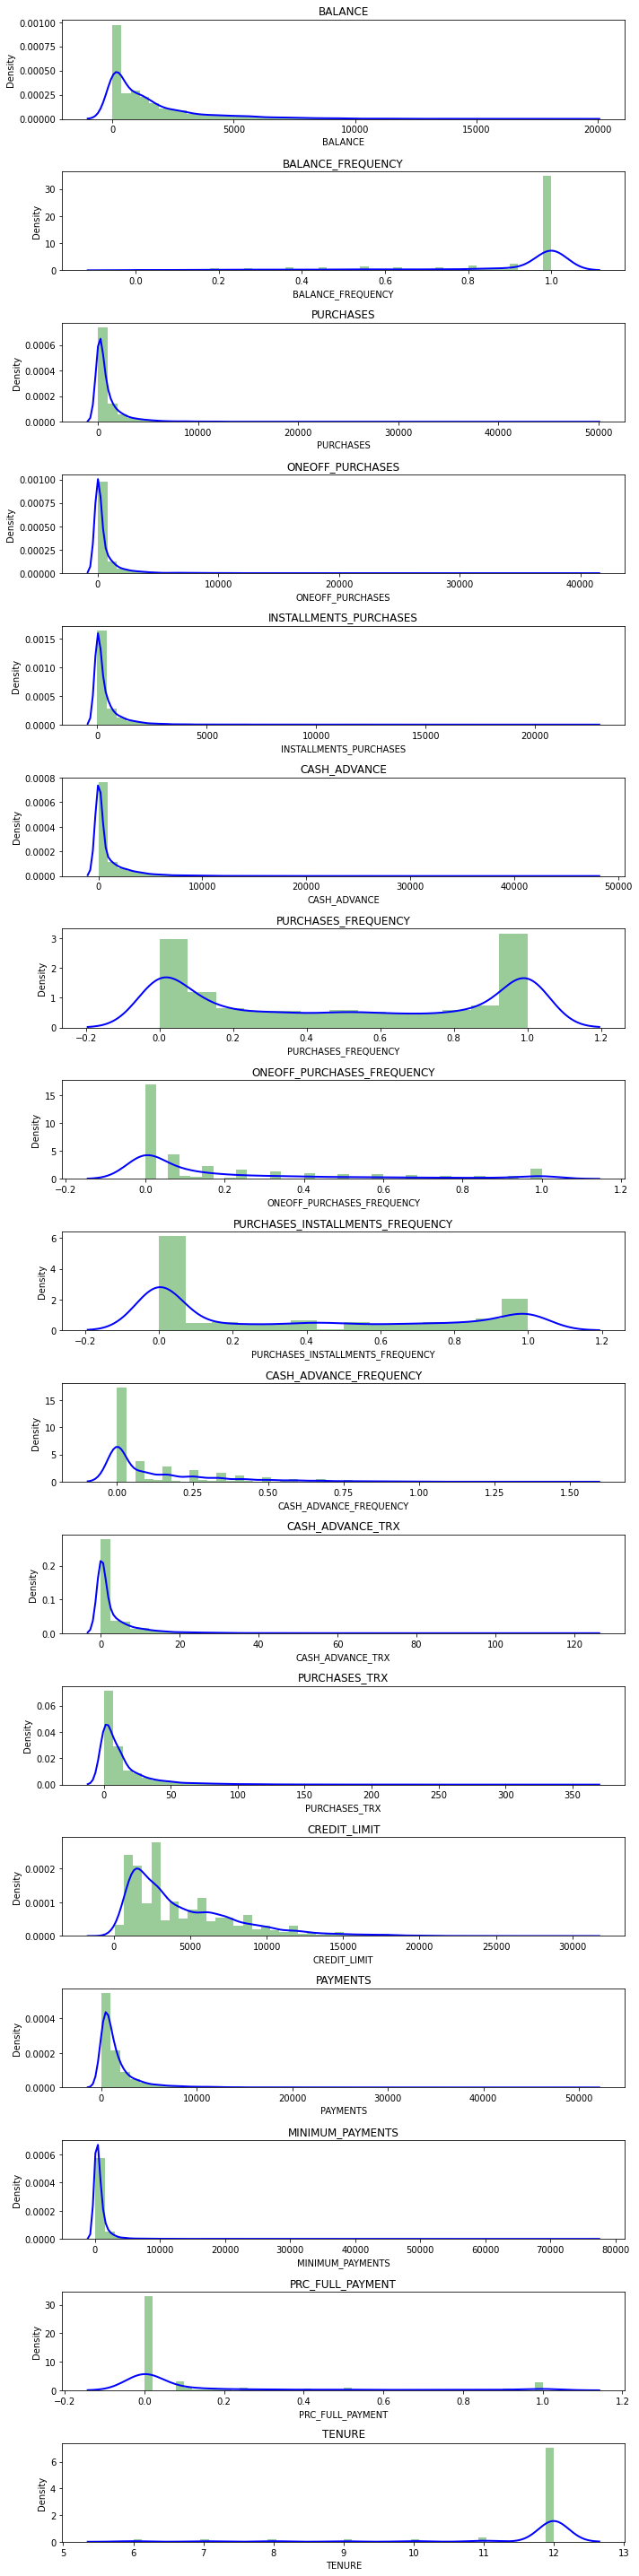

In [19]:
plt.figure(figsize = (10, 40))
for i in range(len(creditcard_df.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KED'}, hist_kws={'color': 'g'})
#     start, end = ax.get_xlim()
#     ax.xaxis.set_ticks(np.arange(start, end, 10))
#     ax.set_xticks(minor = True)
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

**3.6 Correlation analysis**

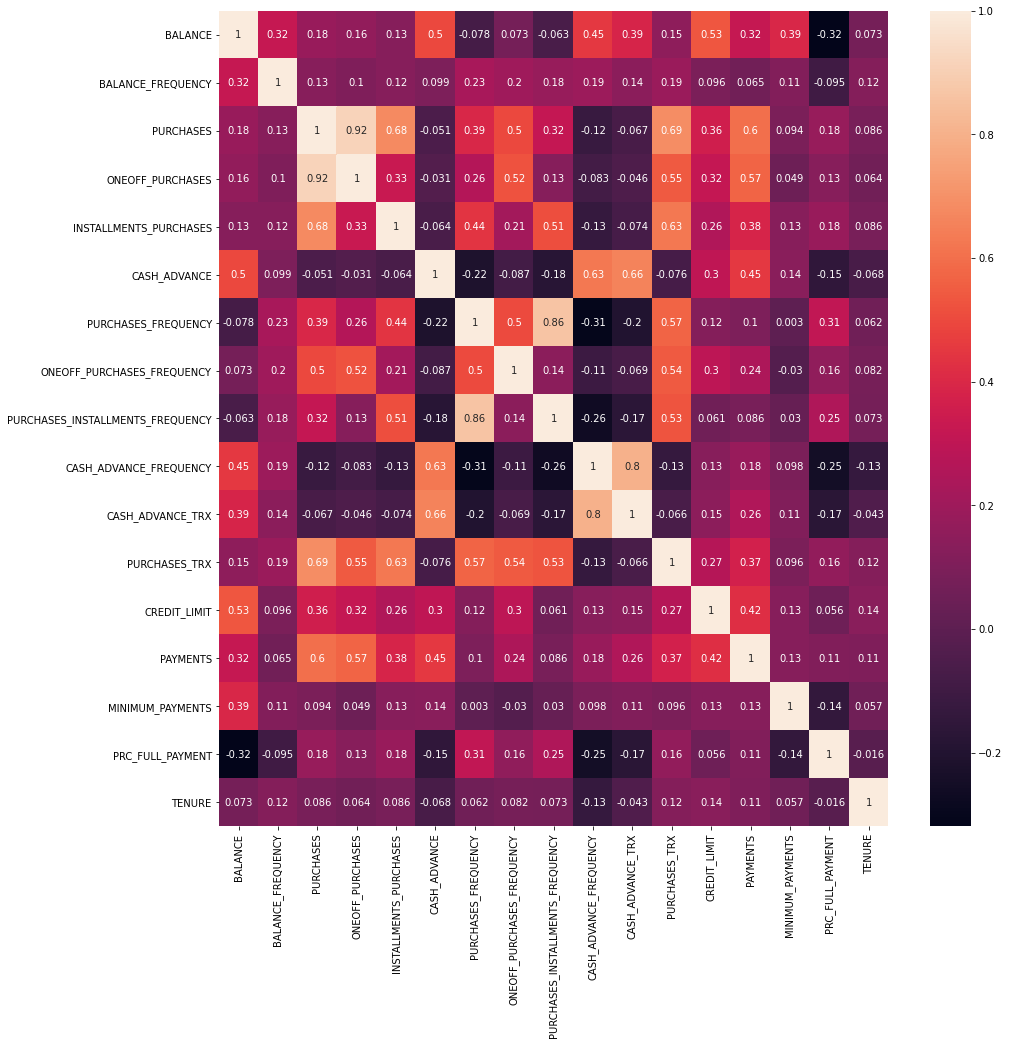

In [20]:
correlation = creditcard_df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation, annot = True)

###**4. K means clustering**

**4.1 Find the optimal number of clusters**

In [21]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
creditcard_df_scaled.shape

(8950, 17)

In [23]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

**take K=8 as indicated below**

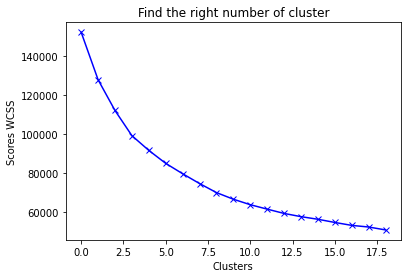

In [24]:
plt.plot(score_1, 'bx-')
plt.title('Find the right number of cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

**4.2 Apply K-means with all features**

In [25]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(creditcard_df_scaled)

In [26]:
labels

array([1, 4, 0, ..., 6, 6, 6], dtype=int32)

**4.3 Cluster feature visualization**

In [27]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [28]:
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40  ...          0.000000      12        1
1  3202.467416           0.909091       0.00  ...          0.222222      12        4
2  2495.148862           1.000000     773.17  ...          0.000000      12        0
3  1666.670542           0.636364    1499.00  ...          0.000000      12        1
4   817.714335           1.000000      16.00  ...          0.000000      12        1

[5 rows x 18 columns]

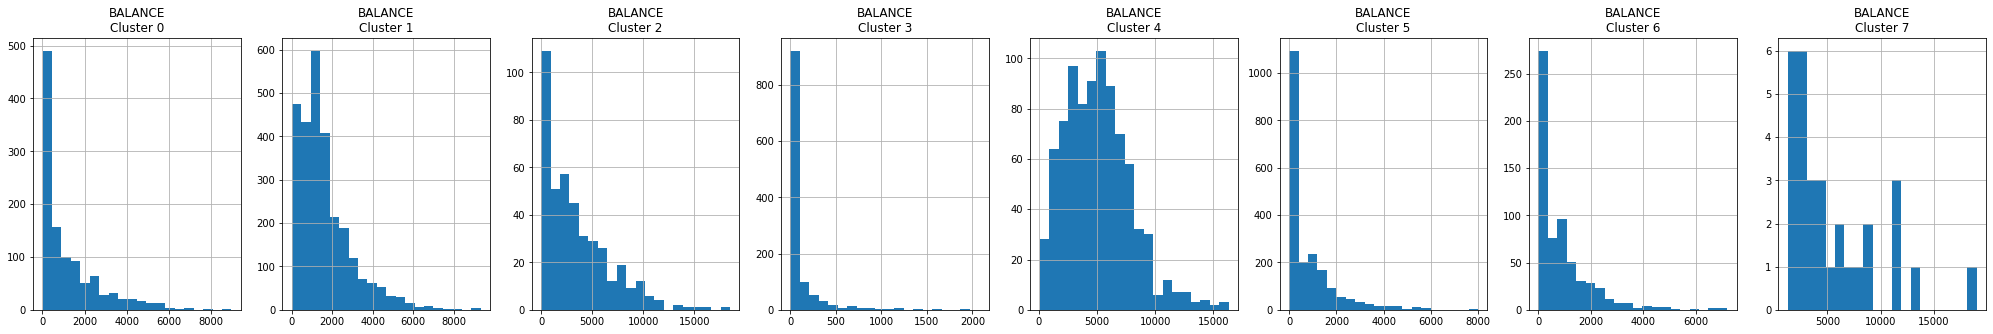

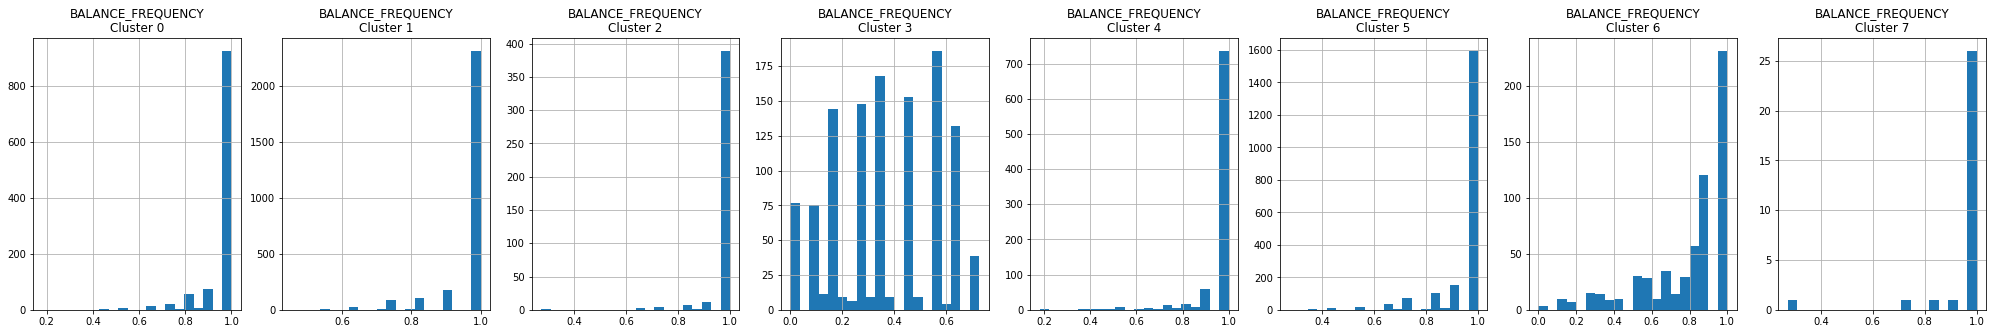

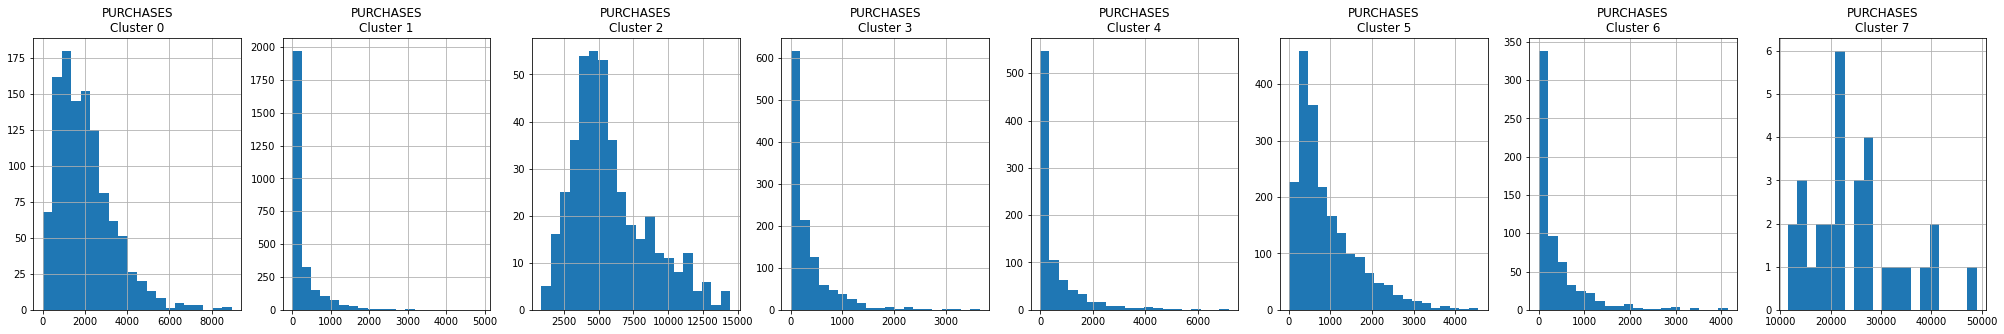

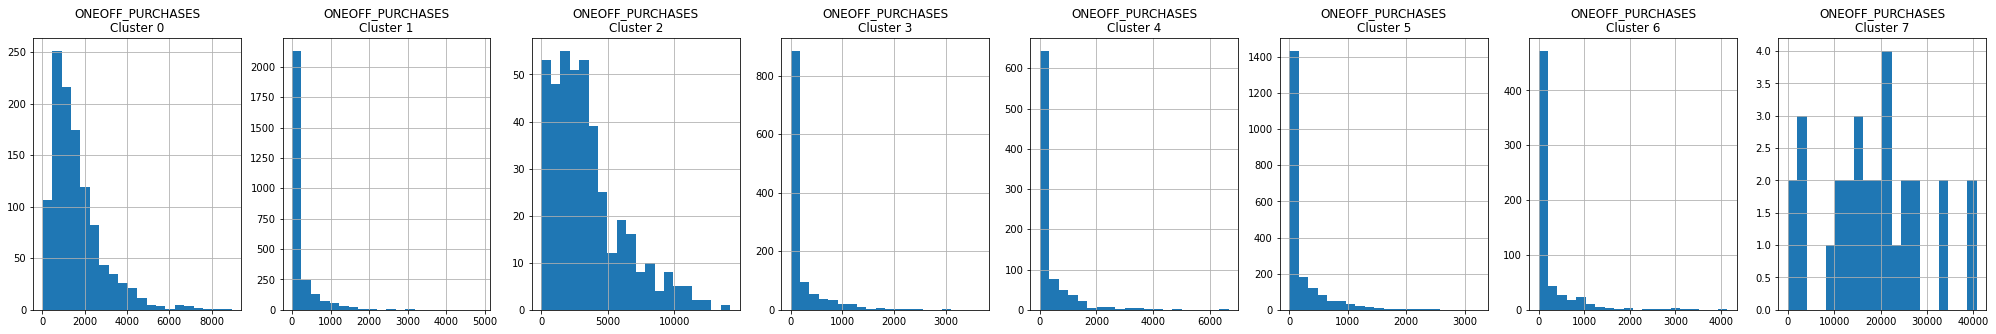

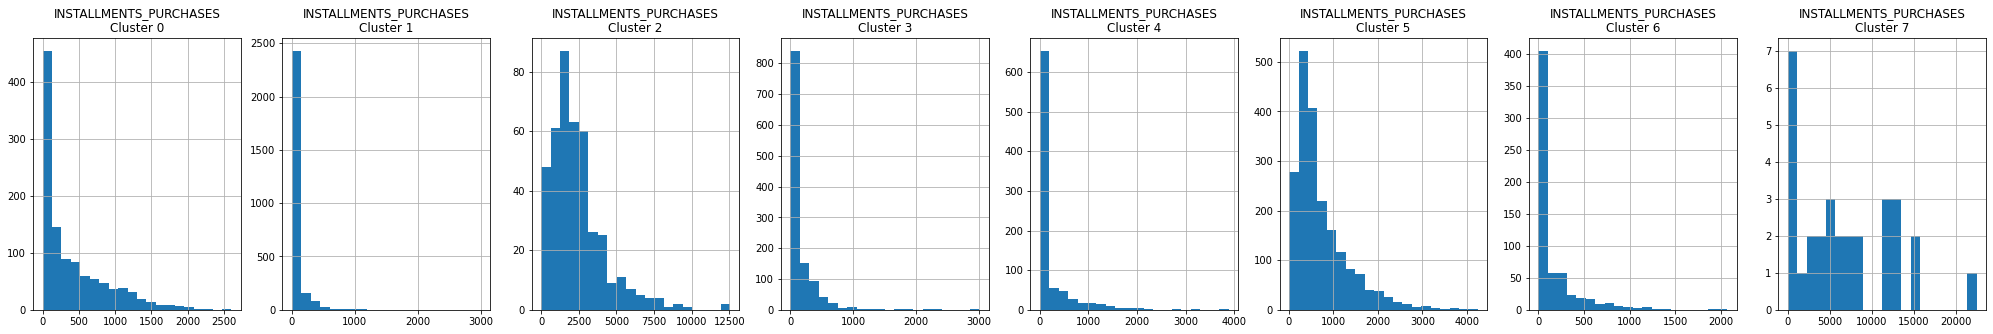

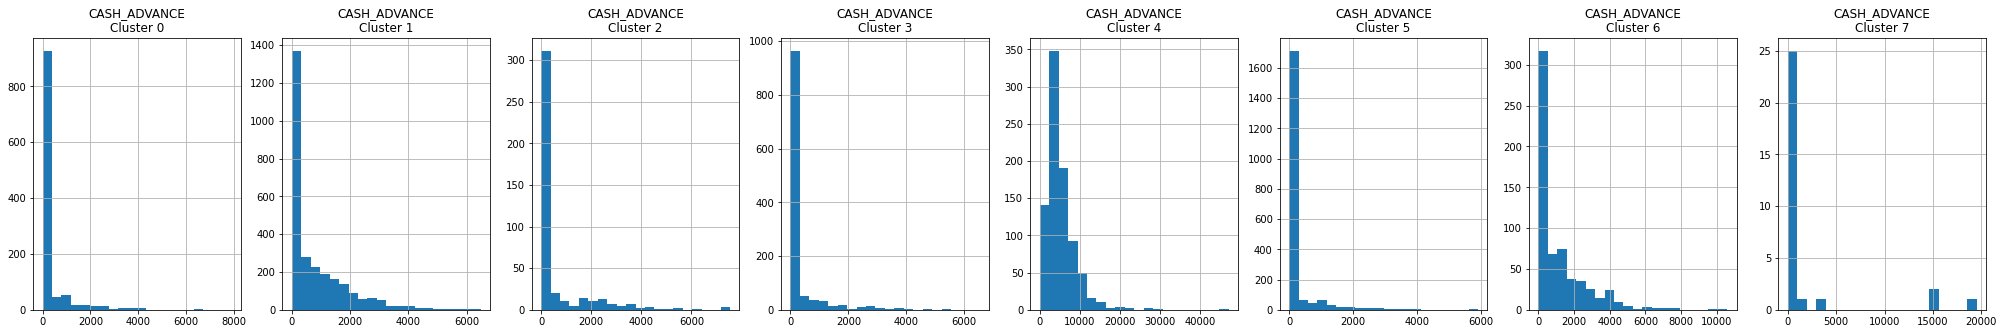

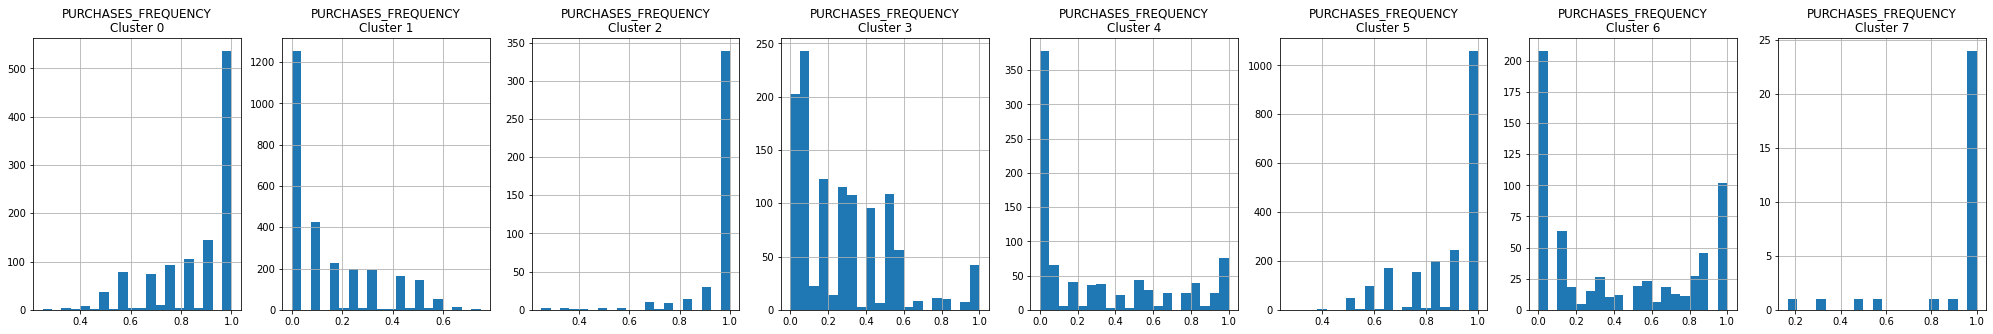

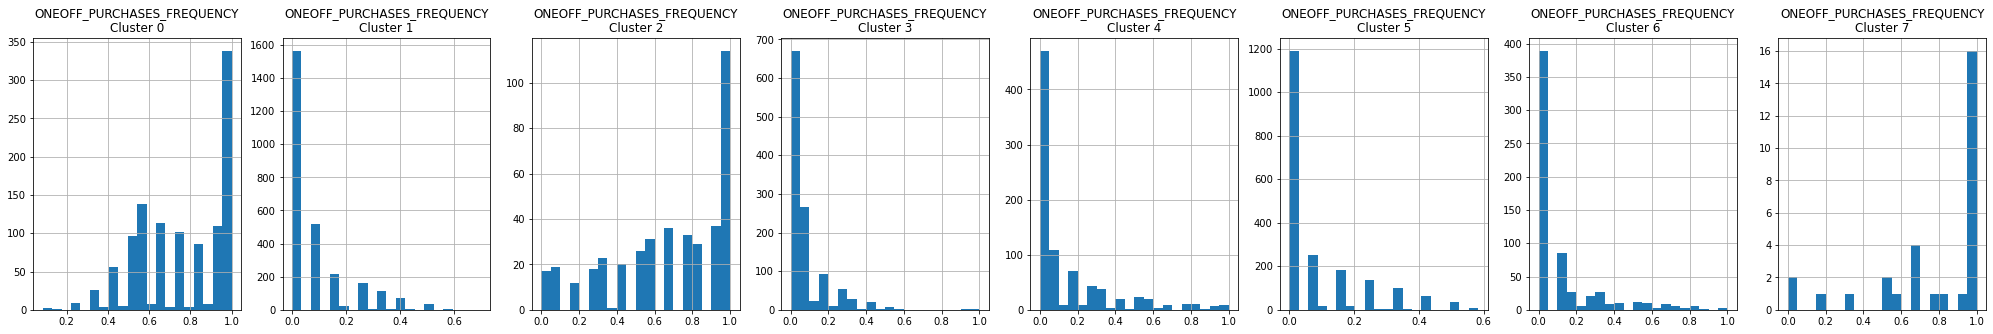

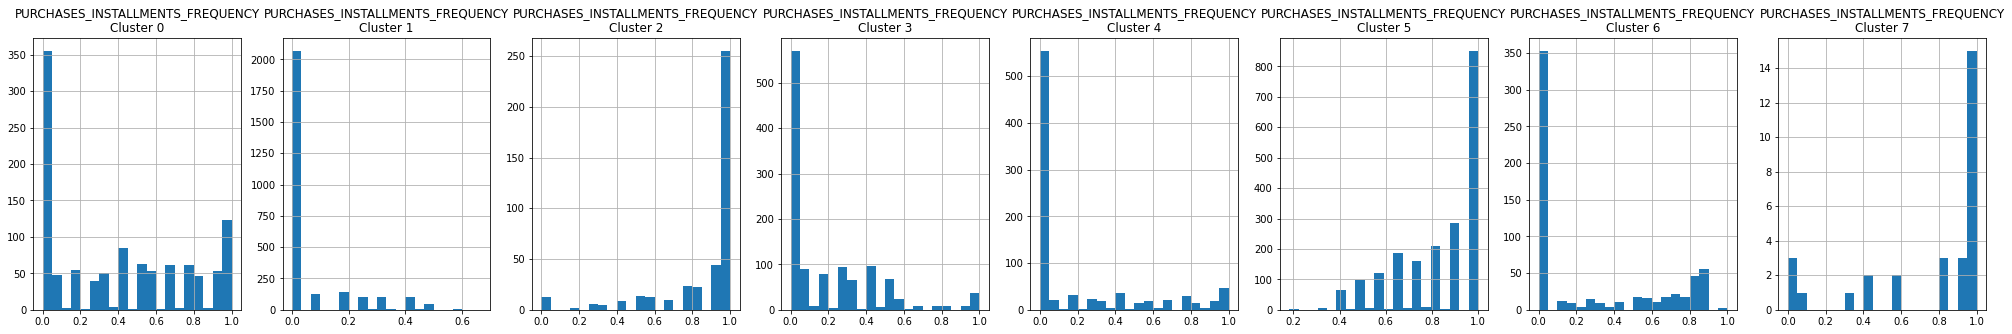

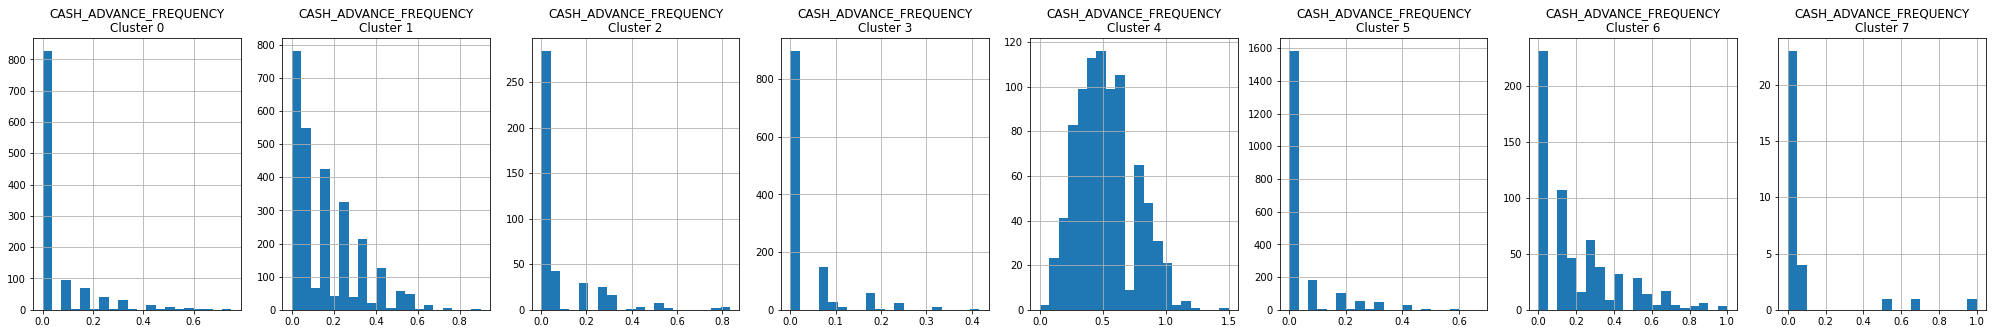

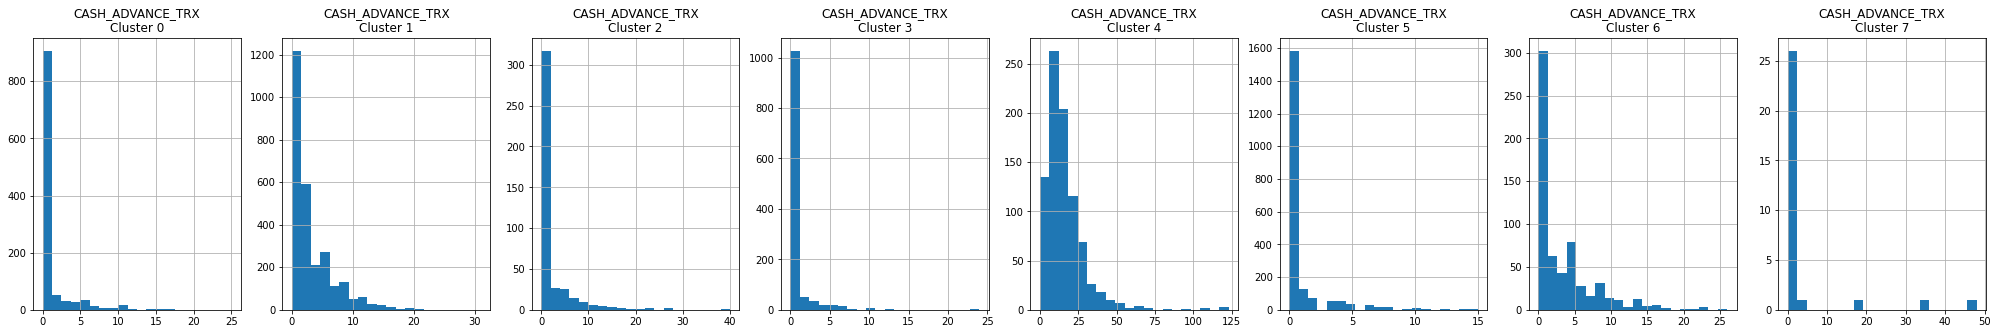

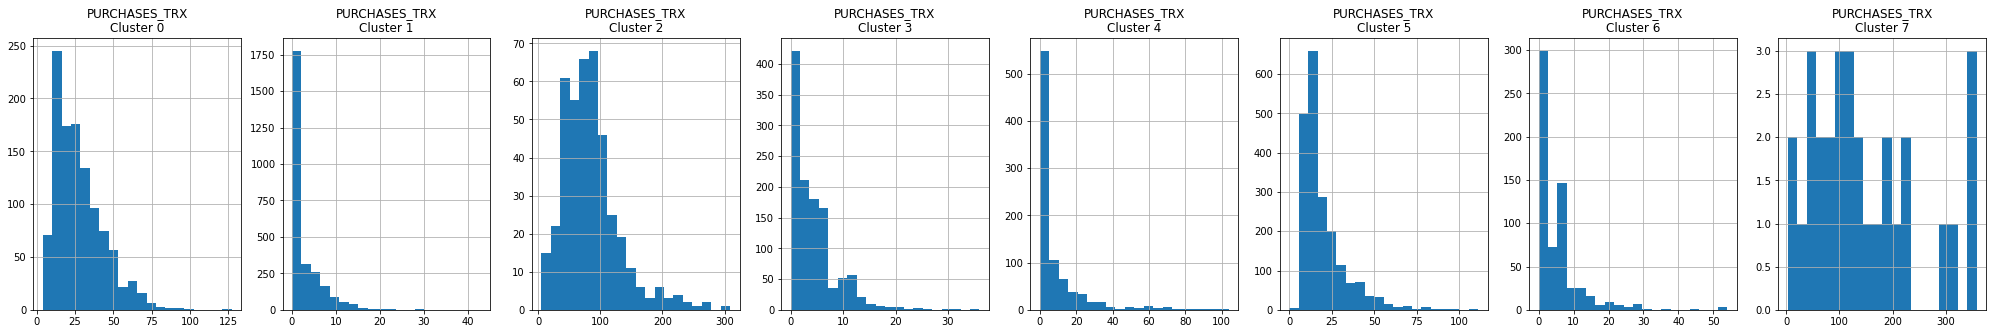

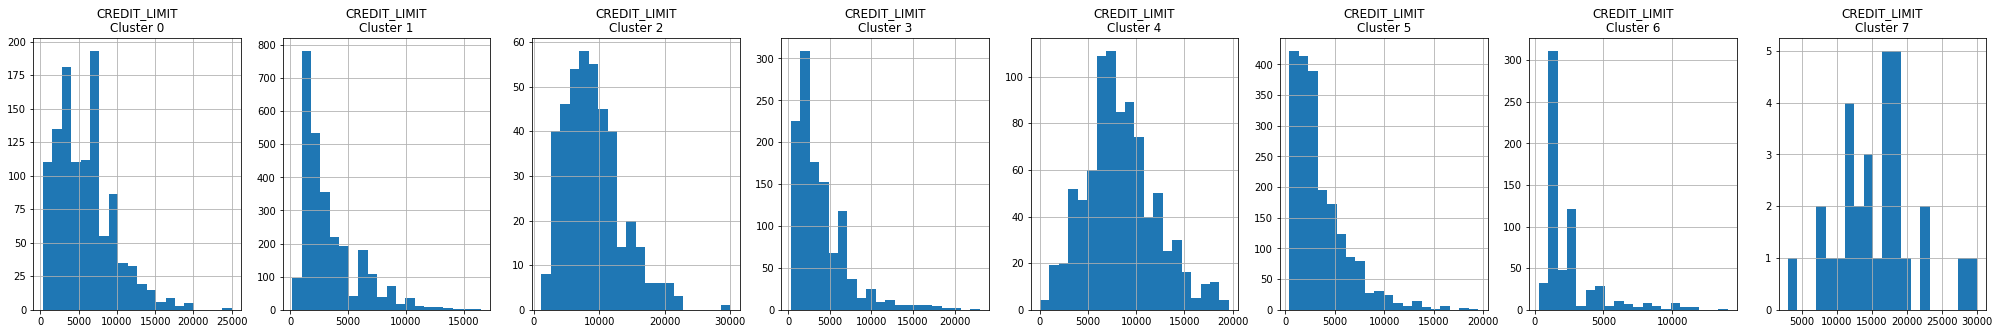

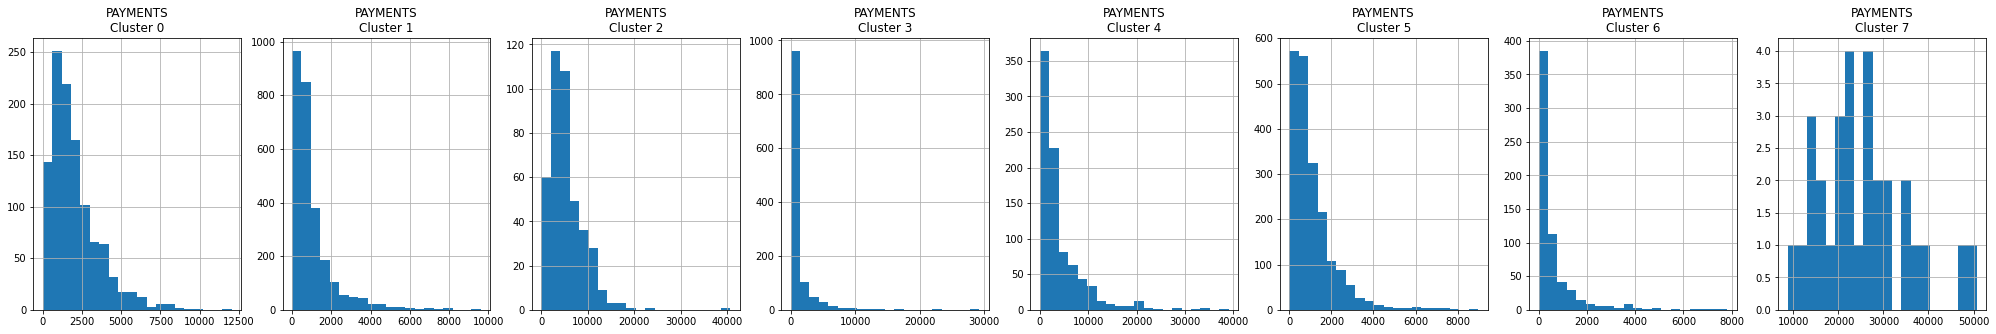

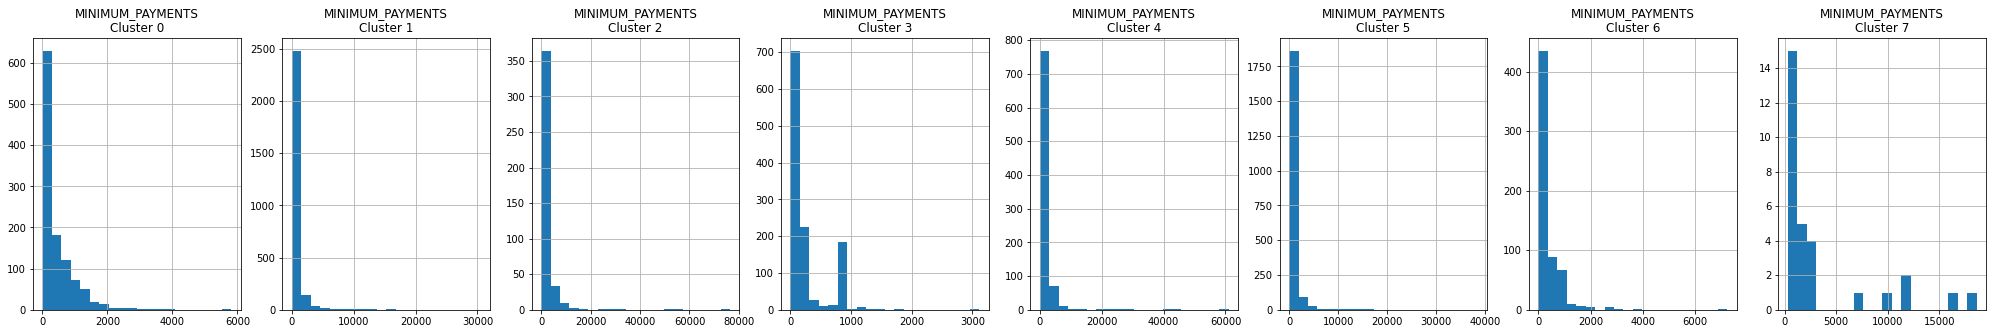

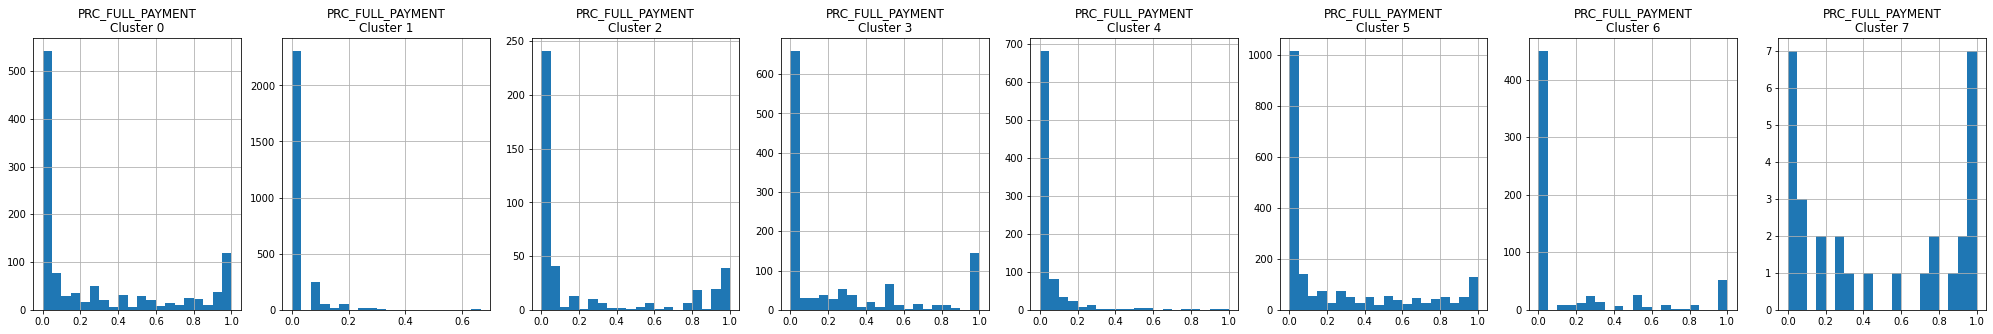

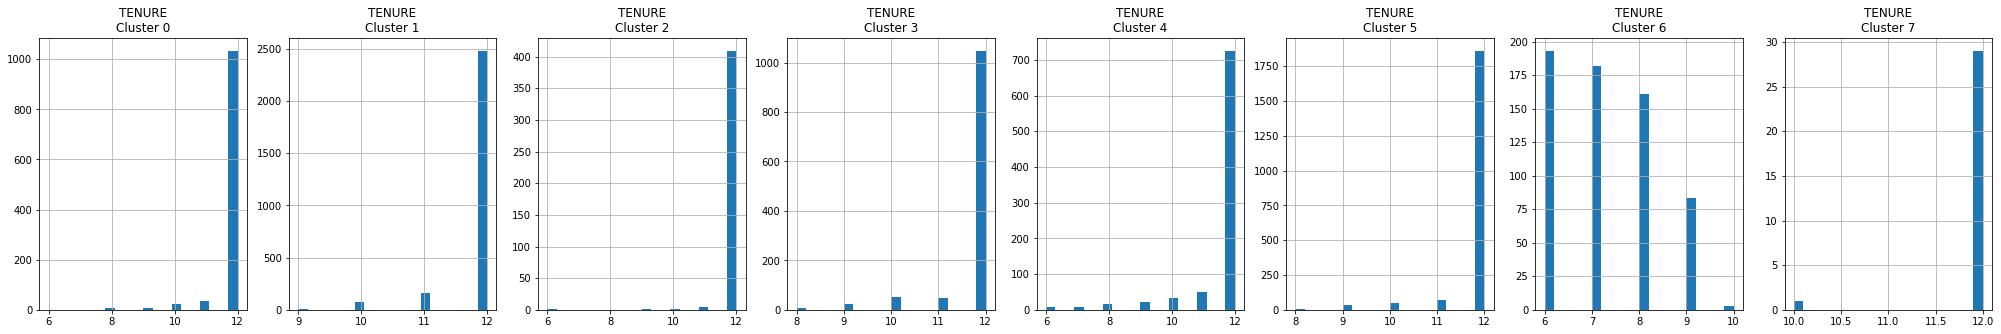

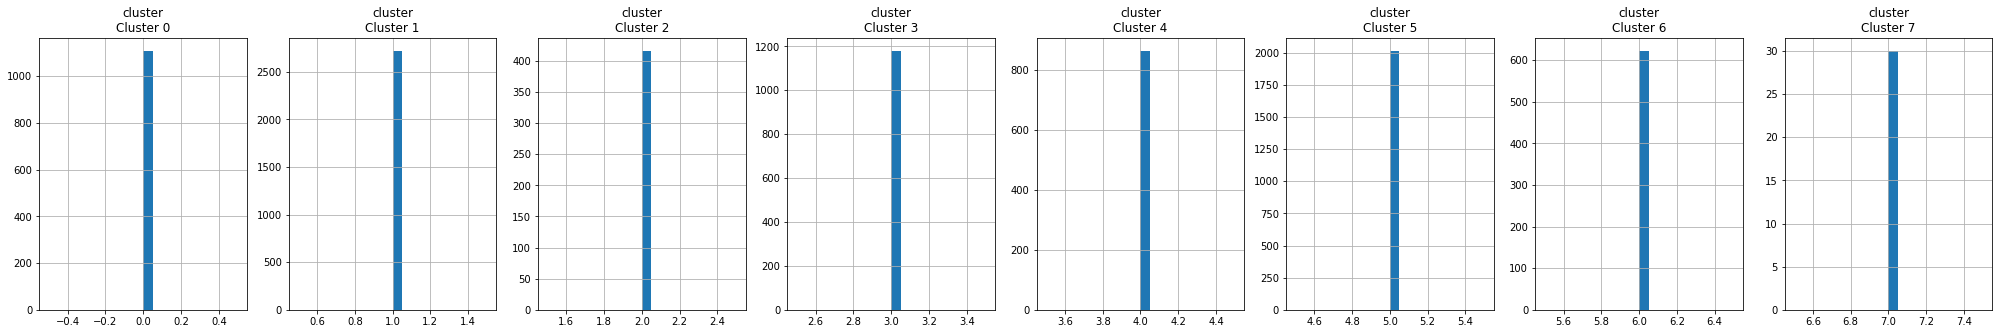

In [29]:
#--each row of figures represents feature distribution for each cluster-----#
for i in creditcard_df_cluster.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[ creditcard_df_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

**4.4 Principle component analysis**

**4.4.1 Compress to 2 vars**

In [30]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221852, -1.07645793],
       [-1.13825512,  2.50638052],
       [ 0.96966893, -0.38349869],
       ...,
       [-0.92621499, -1.81075978],
       [-2.33655241, -0.6579549 ],
       [-0.55641393, -0.40047374]])

In [31]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [32]:
pca_df.head()

pca1      pca2
0 -1.682219 -1.076458
1 -1.138255  2.506381
2  0.969669 -0.383499
3 -0.873636  0.043177
4 -1.599432 -0.688586

**4.4.2 Visualize clustering**

In [33]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

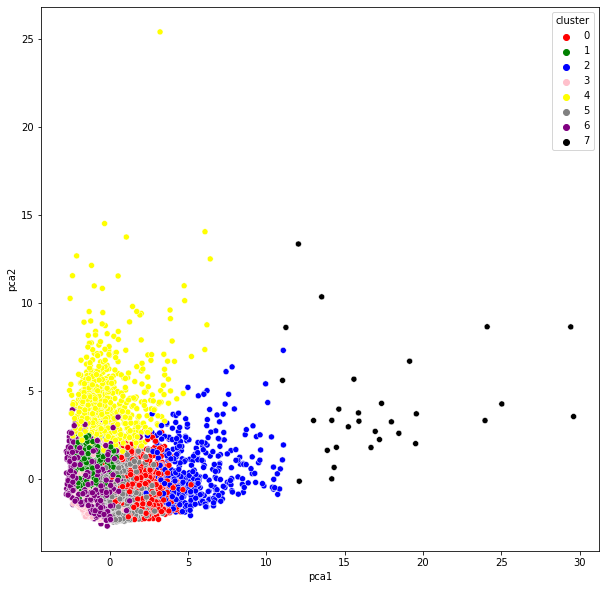

In [34]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

###**5. Autoencoder**  

Autoencoder a type of nn to perform data encoding  
Unsupervised learning with encoding and decoding  
fit the model with the same input and output  
Adding a bottle neck in the network  
Work well for correlated data  

In [35]:
from keras.layers import Input, Dense
from keras.models import Model

**5.1 Create model**

In [36]:
input_df = Input( shape = (17, ))

x = Dense(7, activation = 'relu')(input_df)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
creditcard_df_scaled.shape

(8950, 17)

**5.2 Fit autoencoder**

In [38]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size= 120, epochs = 25, verbose = 1)

Epoch 1/25
75/75 [==============================] - 4s 7ms/step - loss: 0.5537
Epoch 2/25
75/75 [==============================] - 1s 7ms/step - loss: 0.2810
Epoch 3/25
75/75 [==============================] - 1s 7ms/step - loss: 0.2172
Epoch 4/25
75/75 [==============================] - 1s 7ms/step - loss: 0.1745
Epoch 5/25
75/75 [==============================] - 0s 7ms/step - loss: 0.1547
Epoch 6/25
75/75 [==============================] - 1s 7ms/step - loss: 0.1378
Epoch 7/25
75/75 [==============================] - 0s 7ms/step - loss: 0.1314
Epoch 8/25
75/75 [==============================] - 0s 6ms/step - loss: 0.1074
Epoch 9/25
75/75 [==============================] - 0s 7ms/step - loss: 0.1027
Epoch 10/25
75/75 [==============================] - 0s 7ms/step - loss: 0.1009
Epoch 11/25
75/75 [==============================] - 0s 6ms/step - loss: 0.0866
Epoch 12/25
75/75 [==============================] - 0s 6ms/step - loss: 0.0880
Epoch 13/25
75/75 [==============================

In [39]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

**5.3 Feature compression**

In [40]:
pred = encoder.predict(creditcard_df_scaled)

In [41]:
pred.shape

(8950, 10)

**5.4 K-means**


**5.4.1 Find the optimal cluster number**

In [42]:
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)

**5.4.2 compare score1 and score2**

**take K=4**

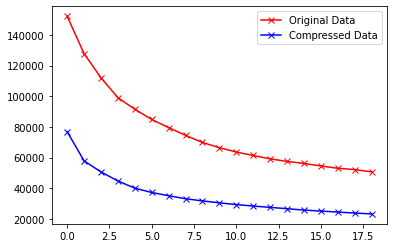

In [43]:
plt.plot(score_1, 'bx-', color = 'r', label = 'Original Data')
plt.plot(score_2, 'bx-', color = 'b', label = 'Compressed Data')
plt.legend()

**5.4.3 Apply K-means**

In [44]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [45]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40  ...          0.000000      12        0
1  3202.467416           0.909091       0.00  ...          0.222222      12        3
2  2495.148862           1.000000     773.17  ...          0.000000      12        1
3  1666.670542           0.636364    1499.00  ...          0.000000      12        0
4   817.714335           1.000000      16.00  ...          0.000000      12        0

[5 rows x 18 columns]

**5.4.4 Cluster feature visualization**

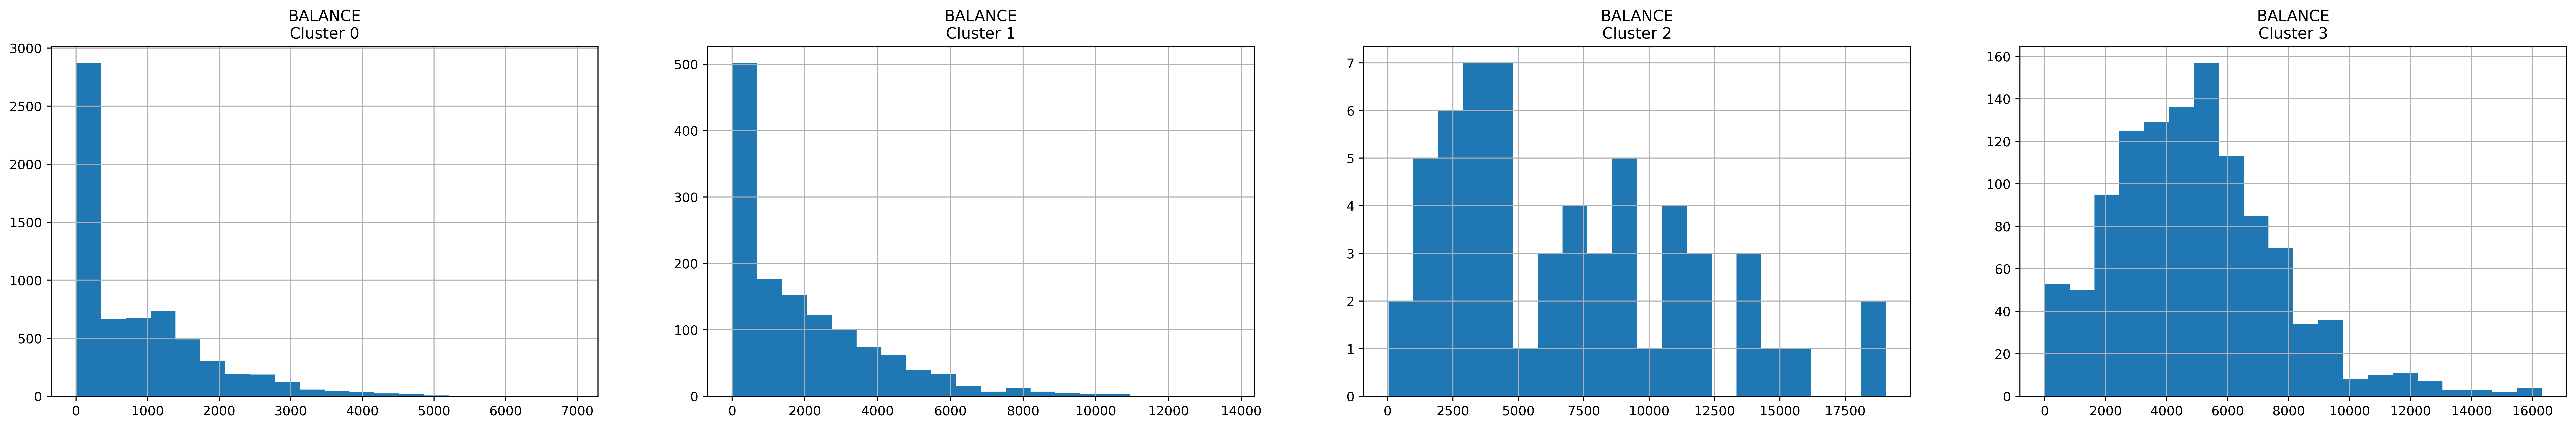

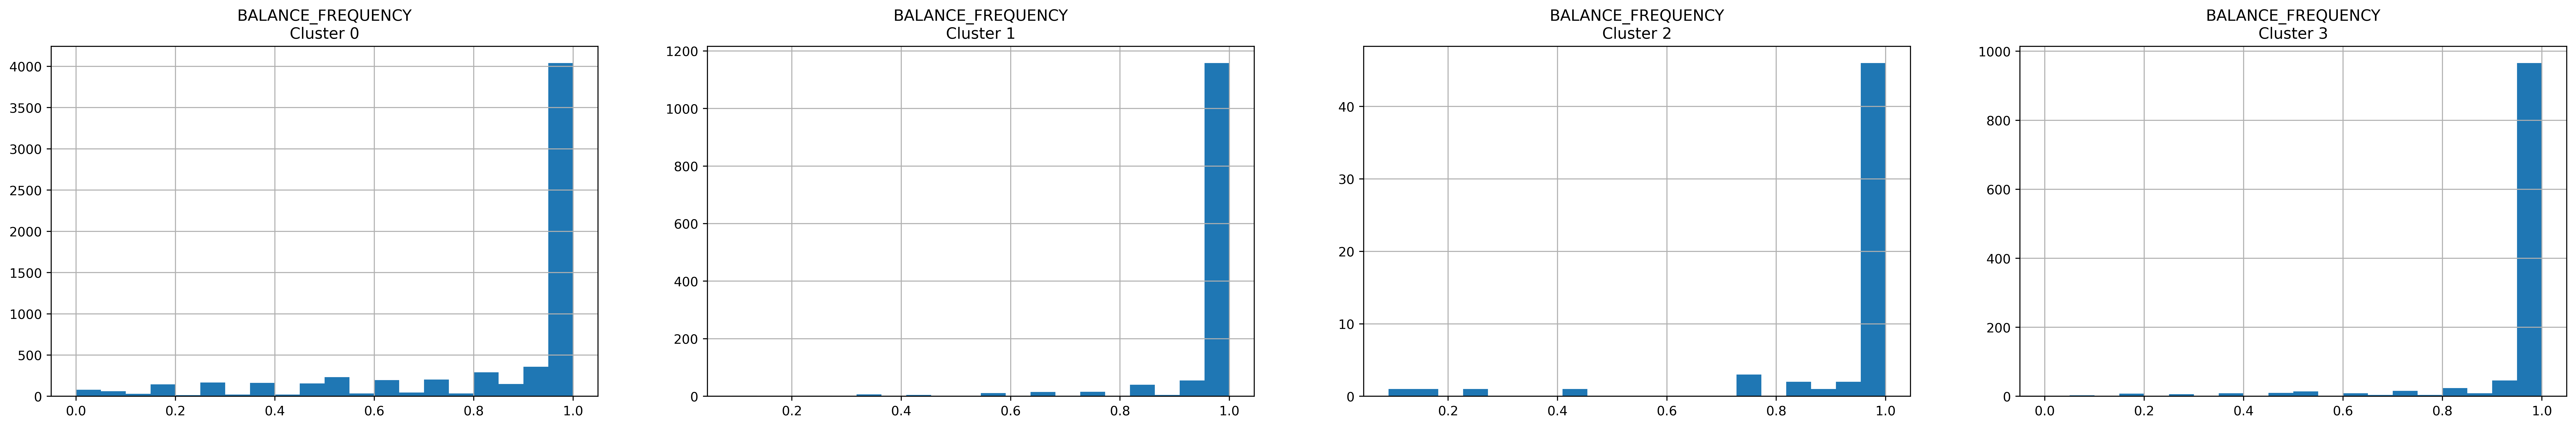

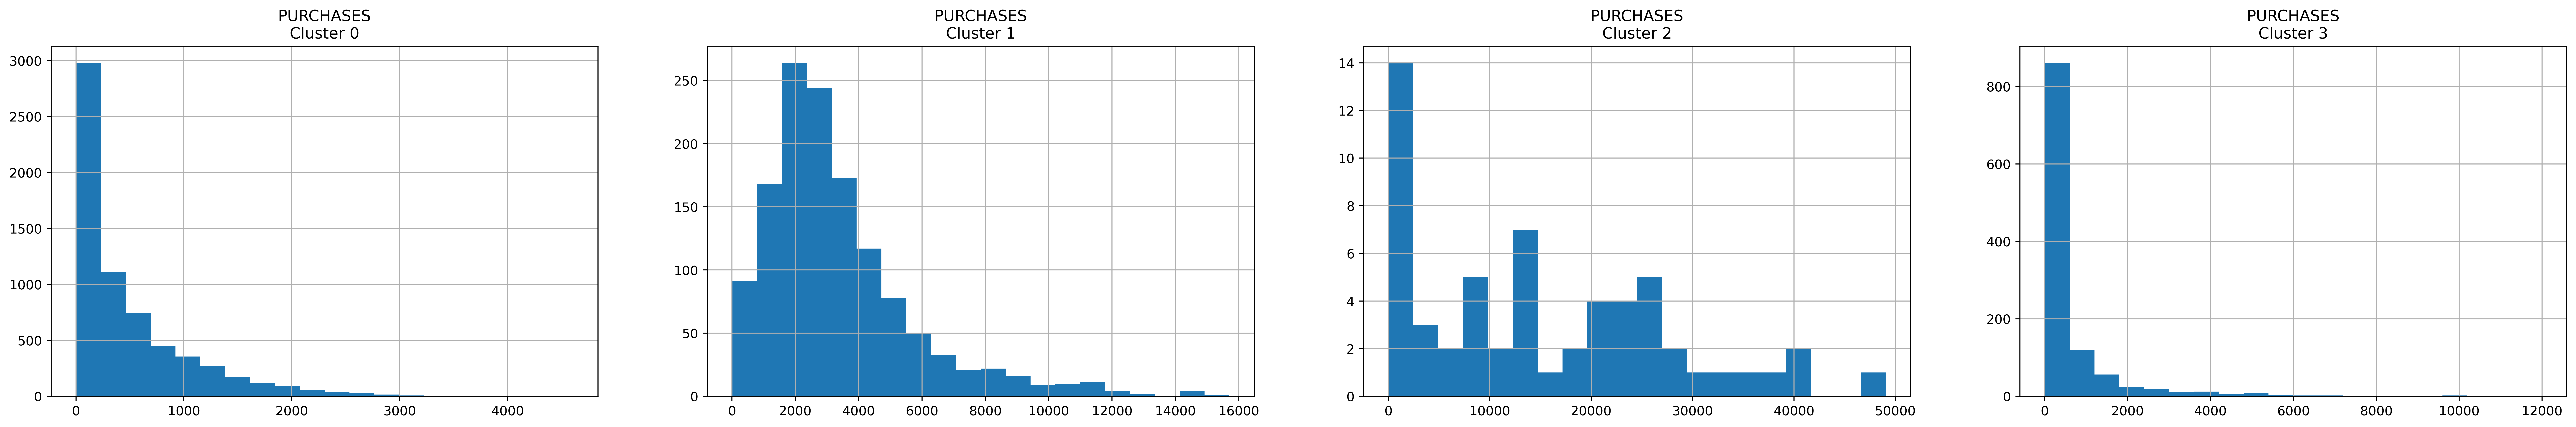

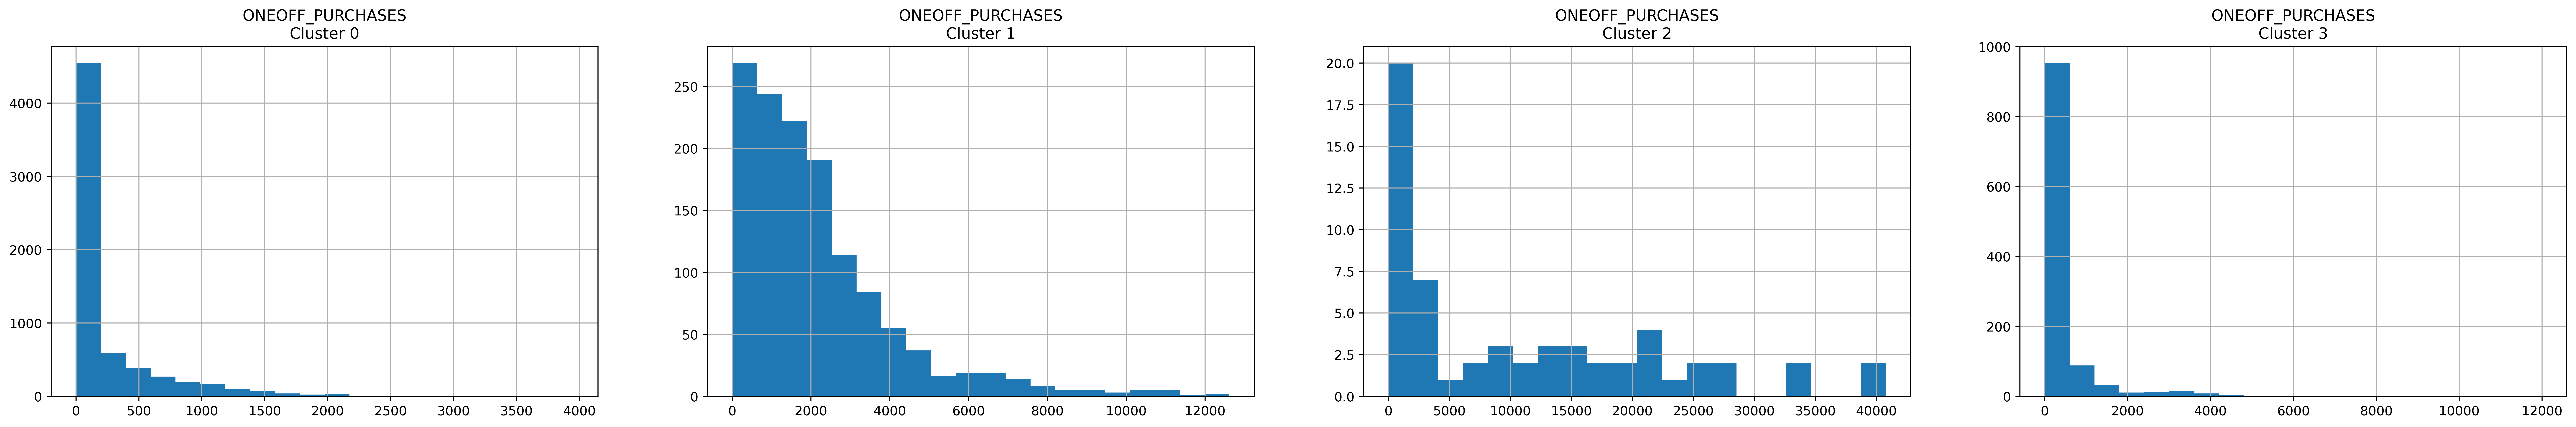

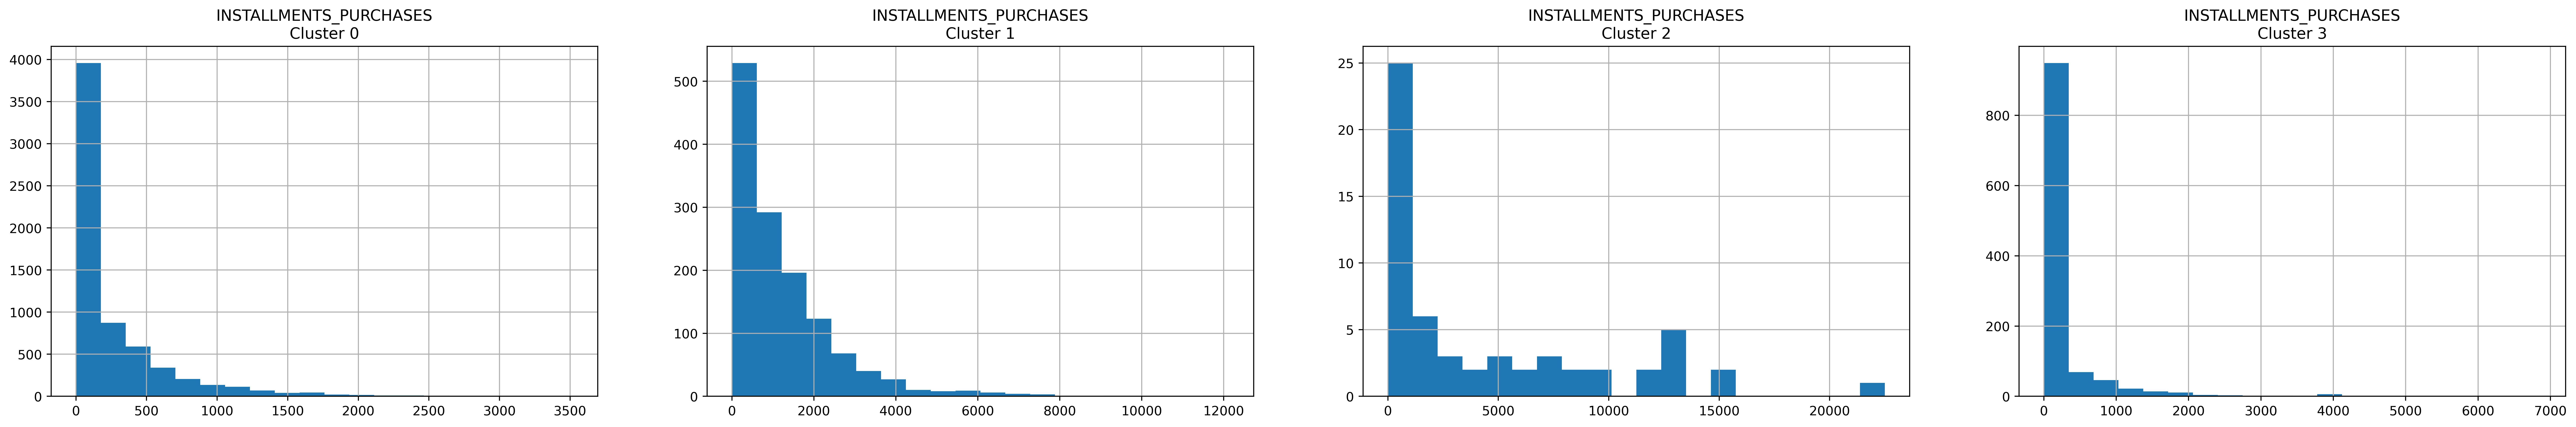

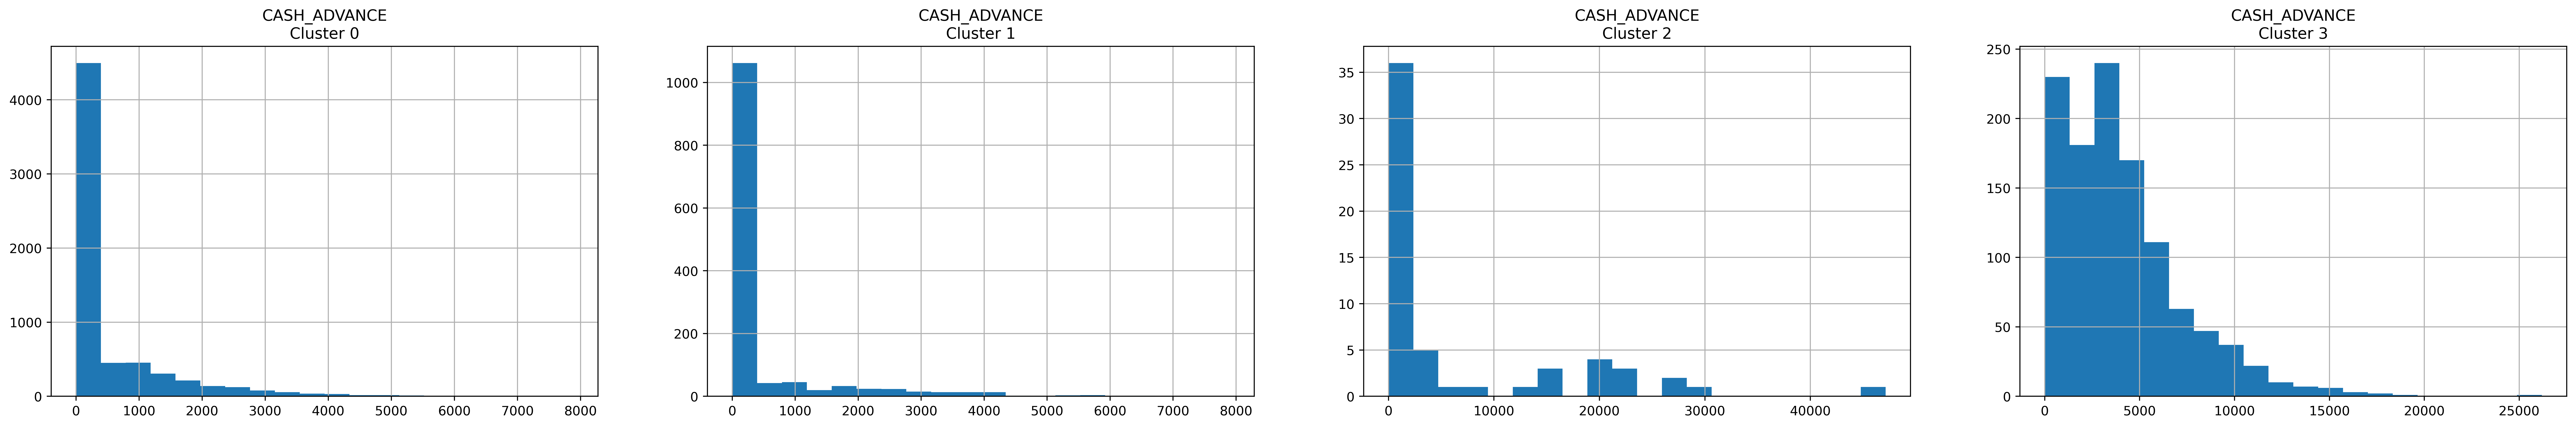

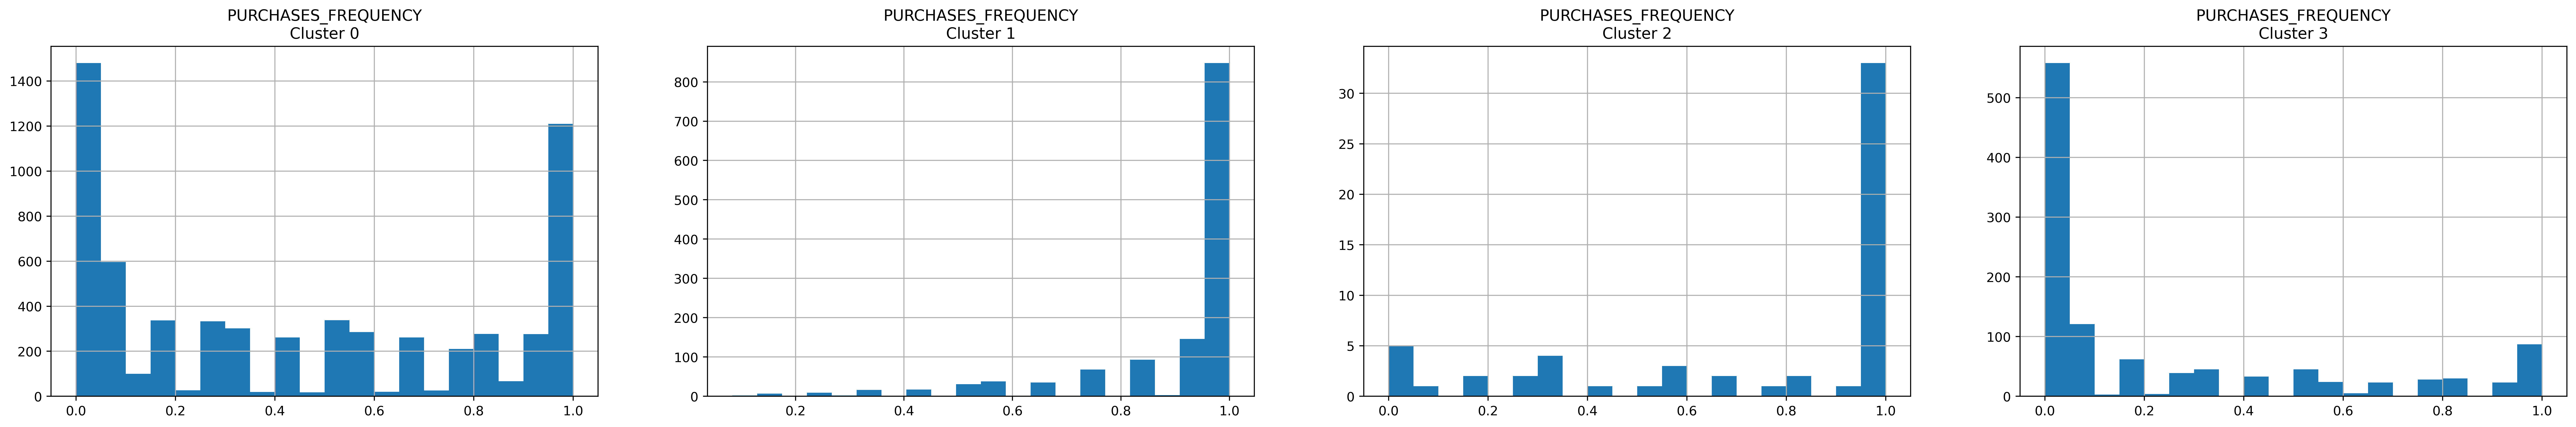

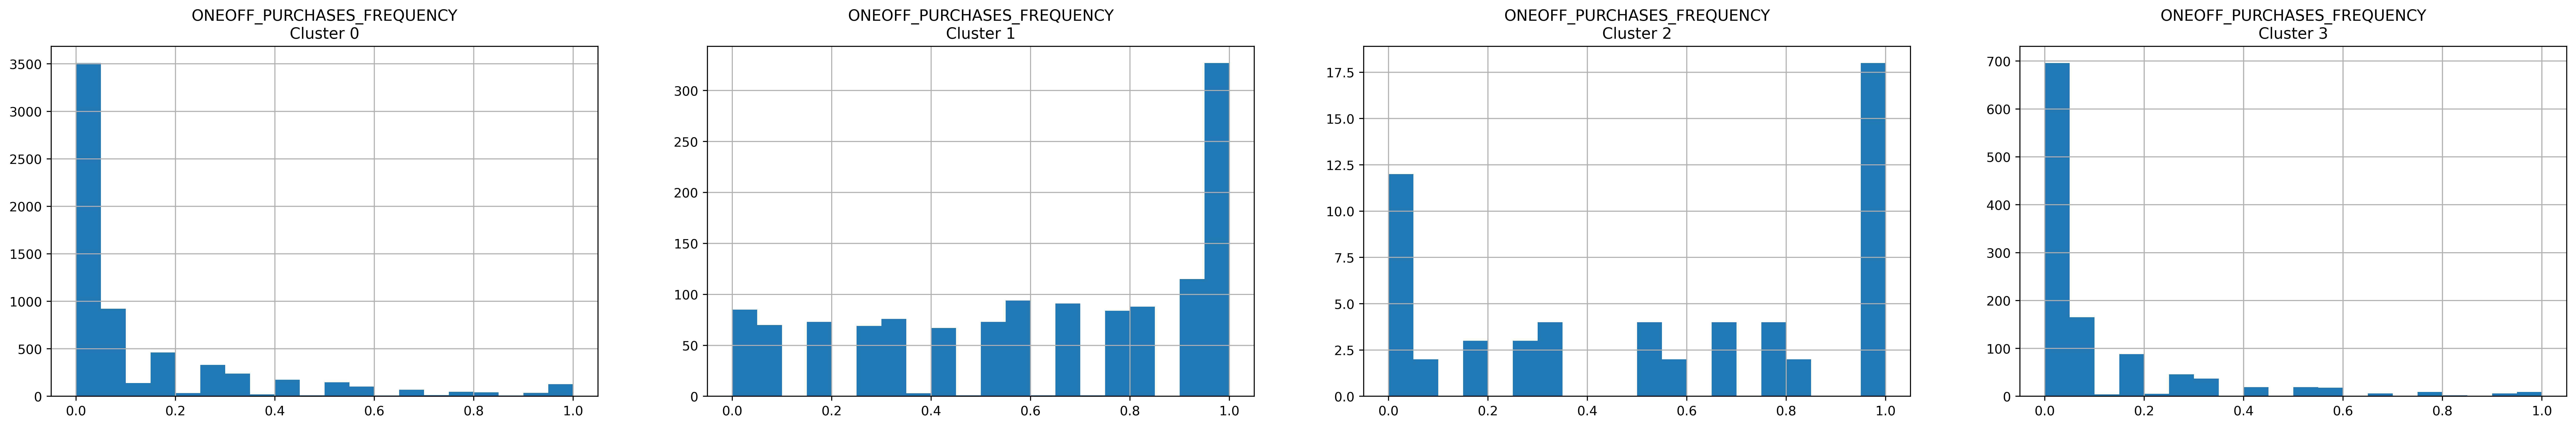

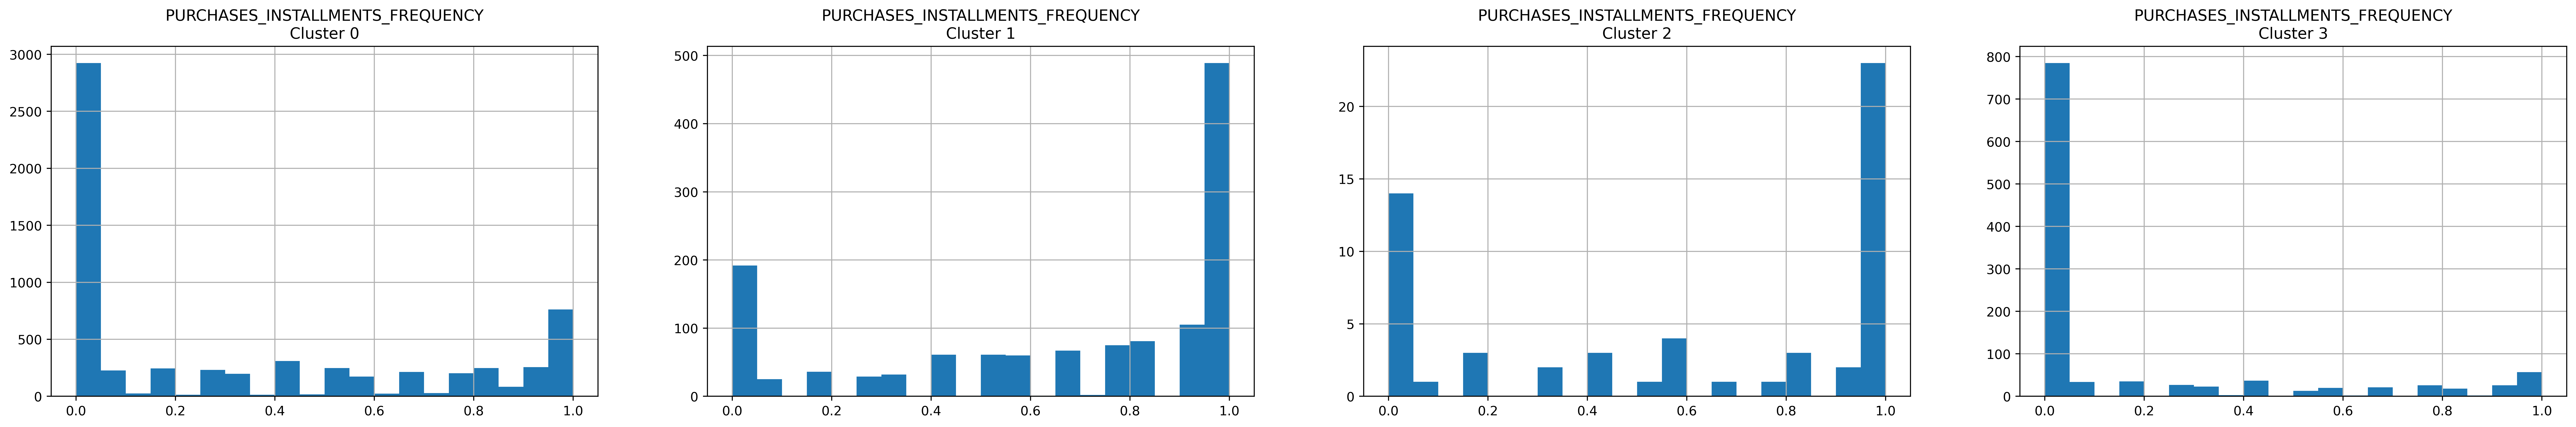

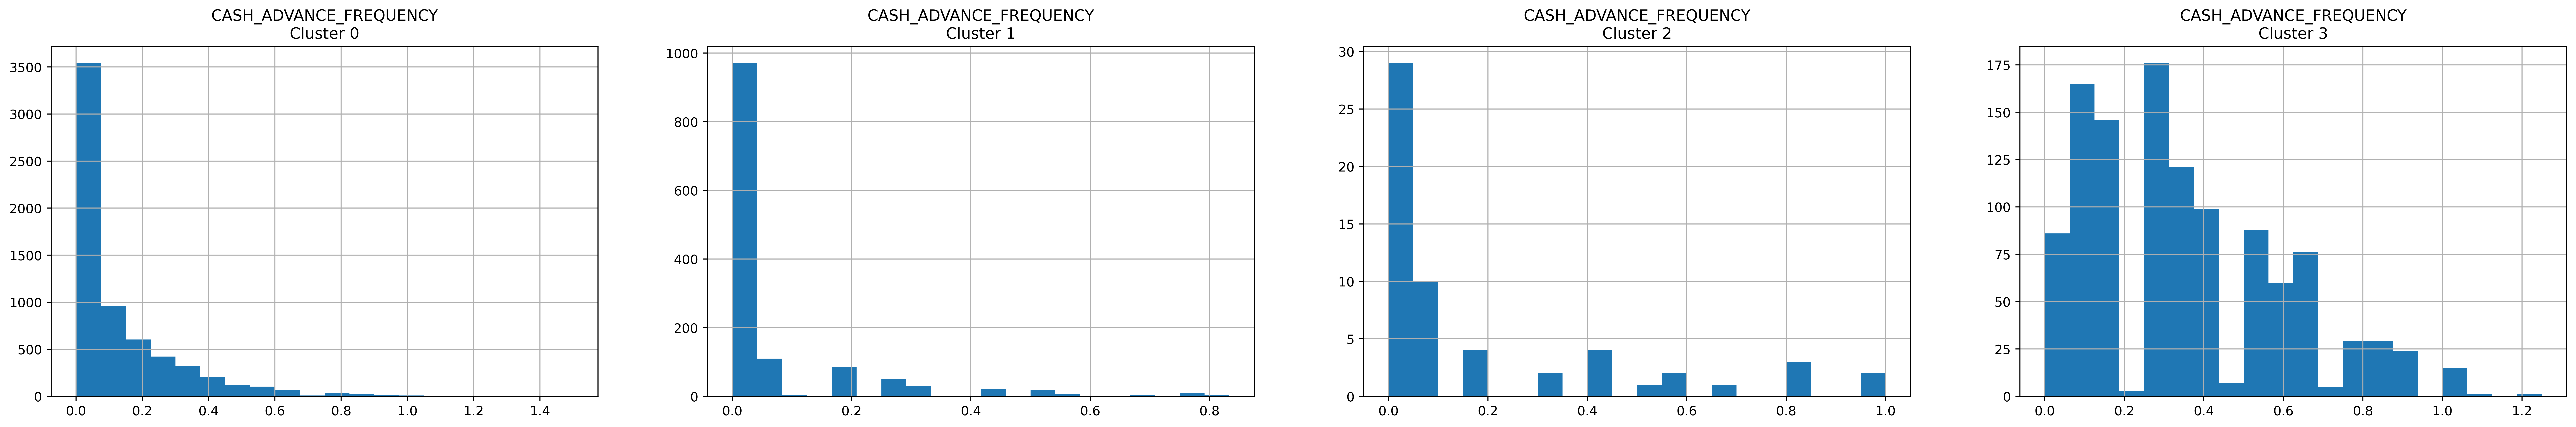

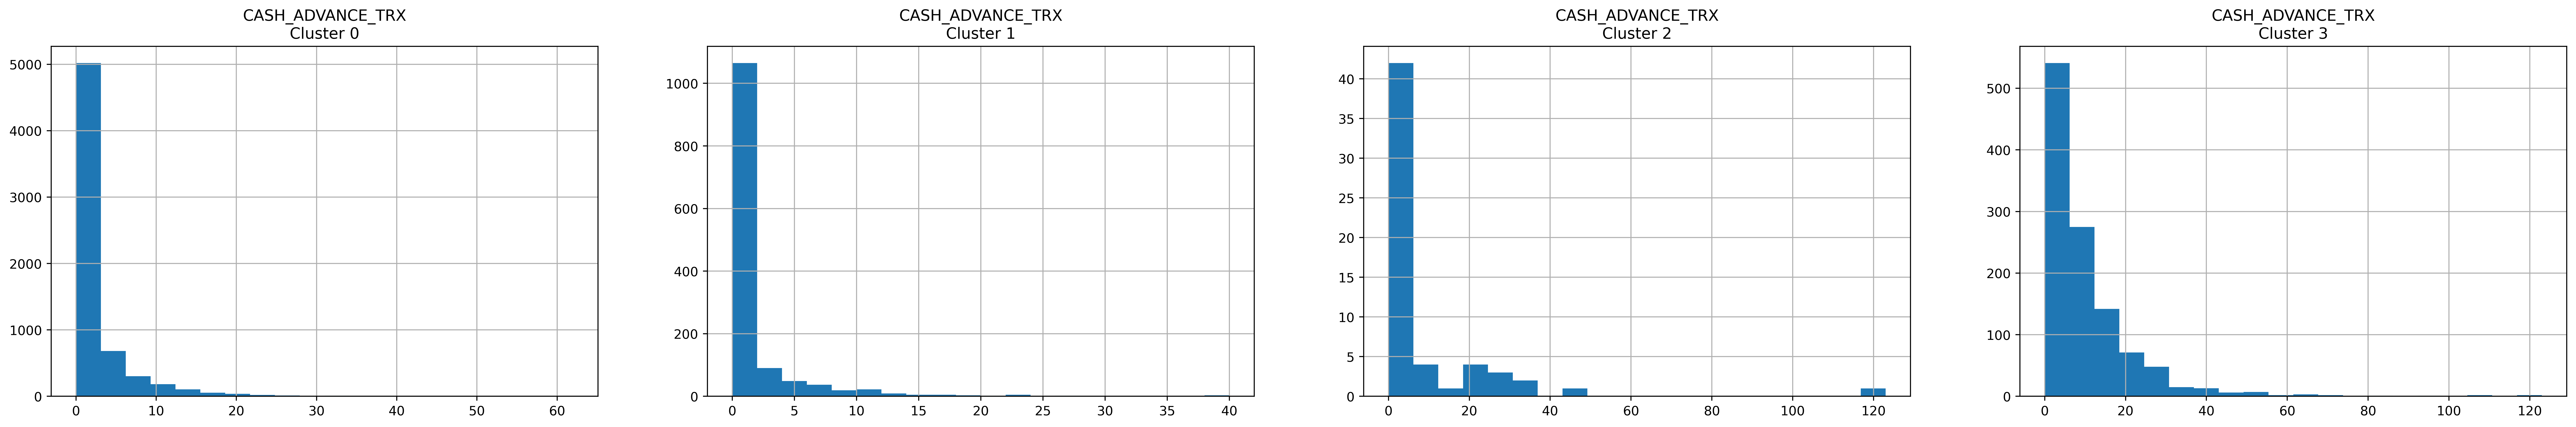

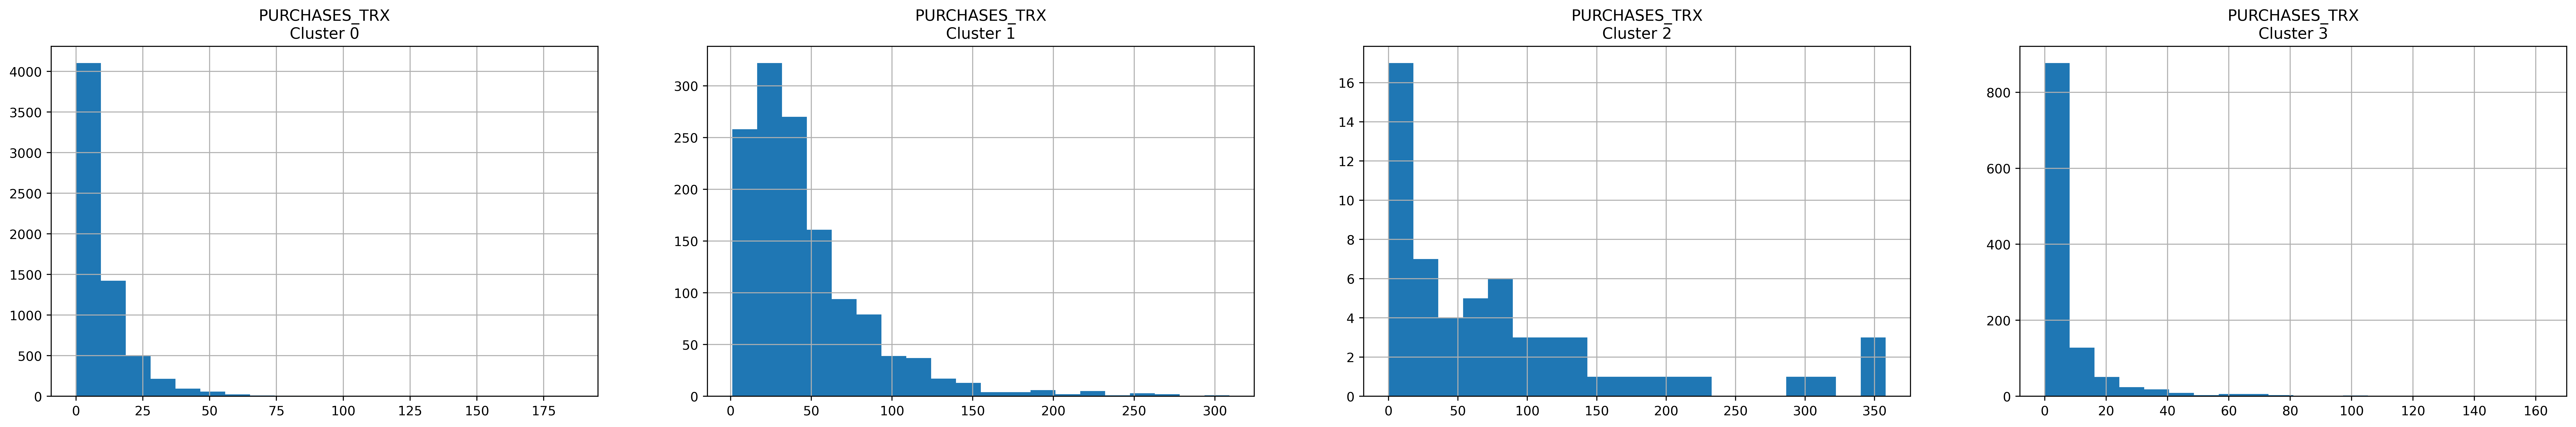

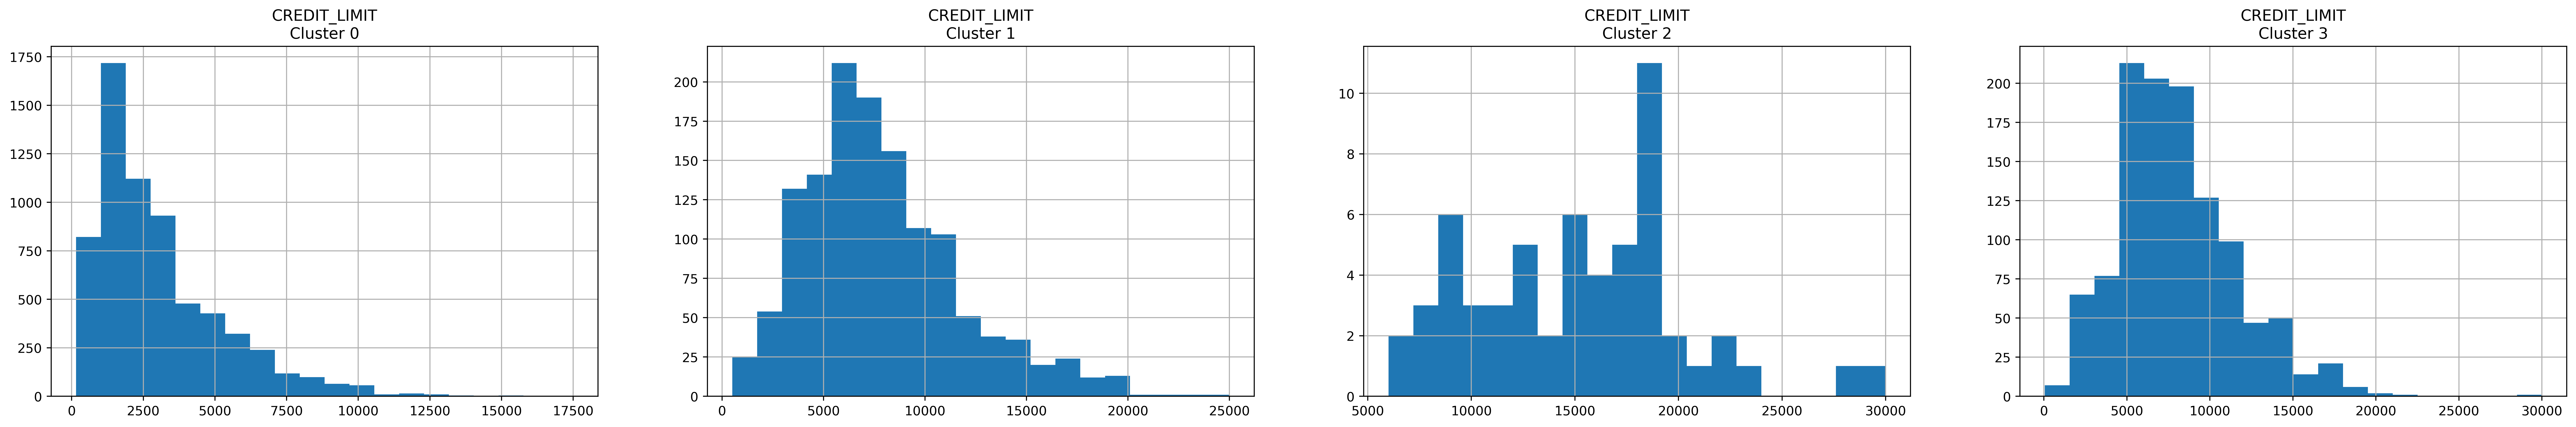

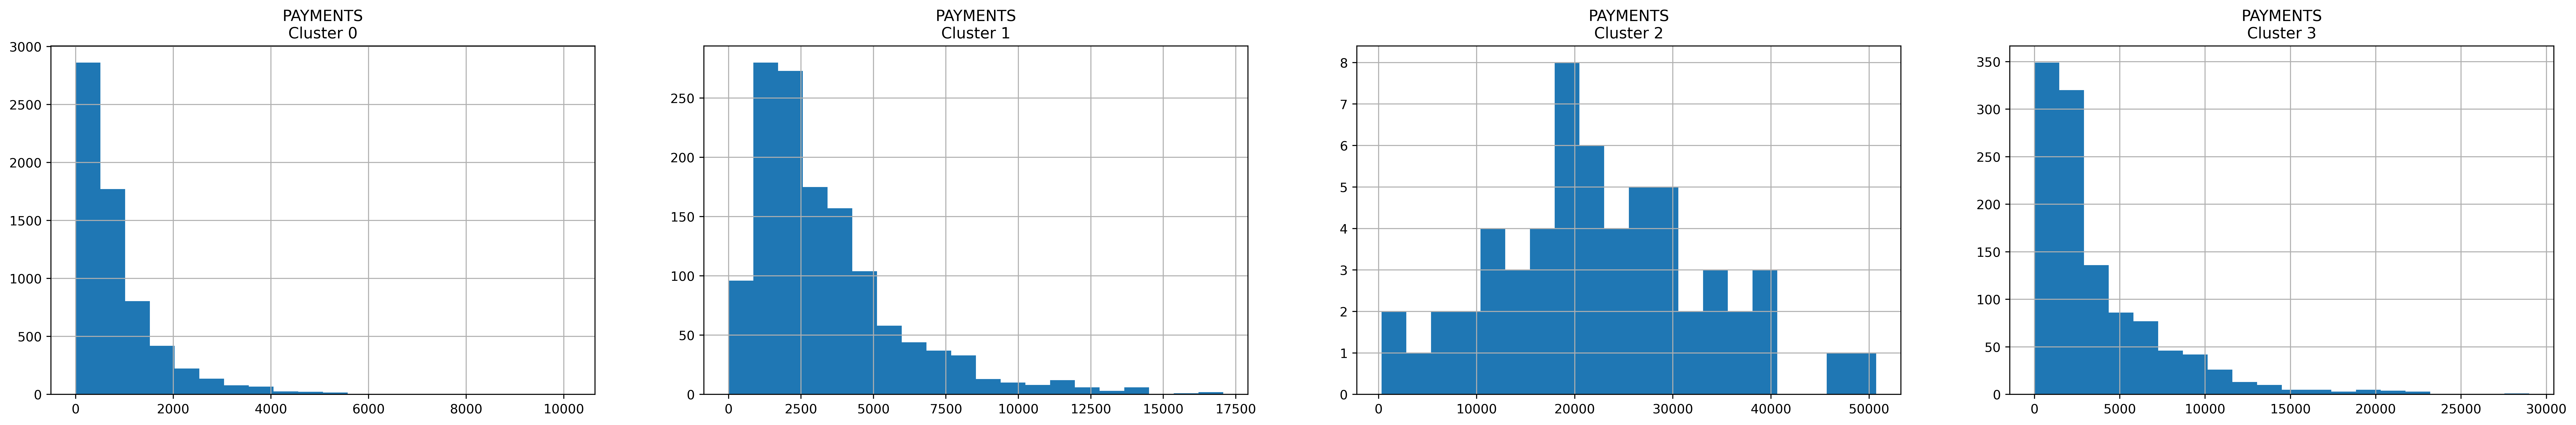

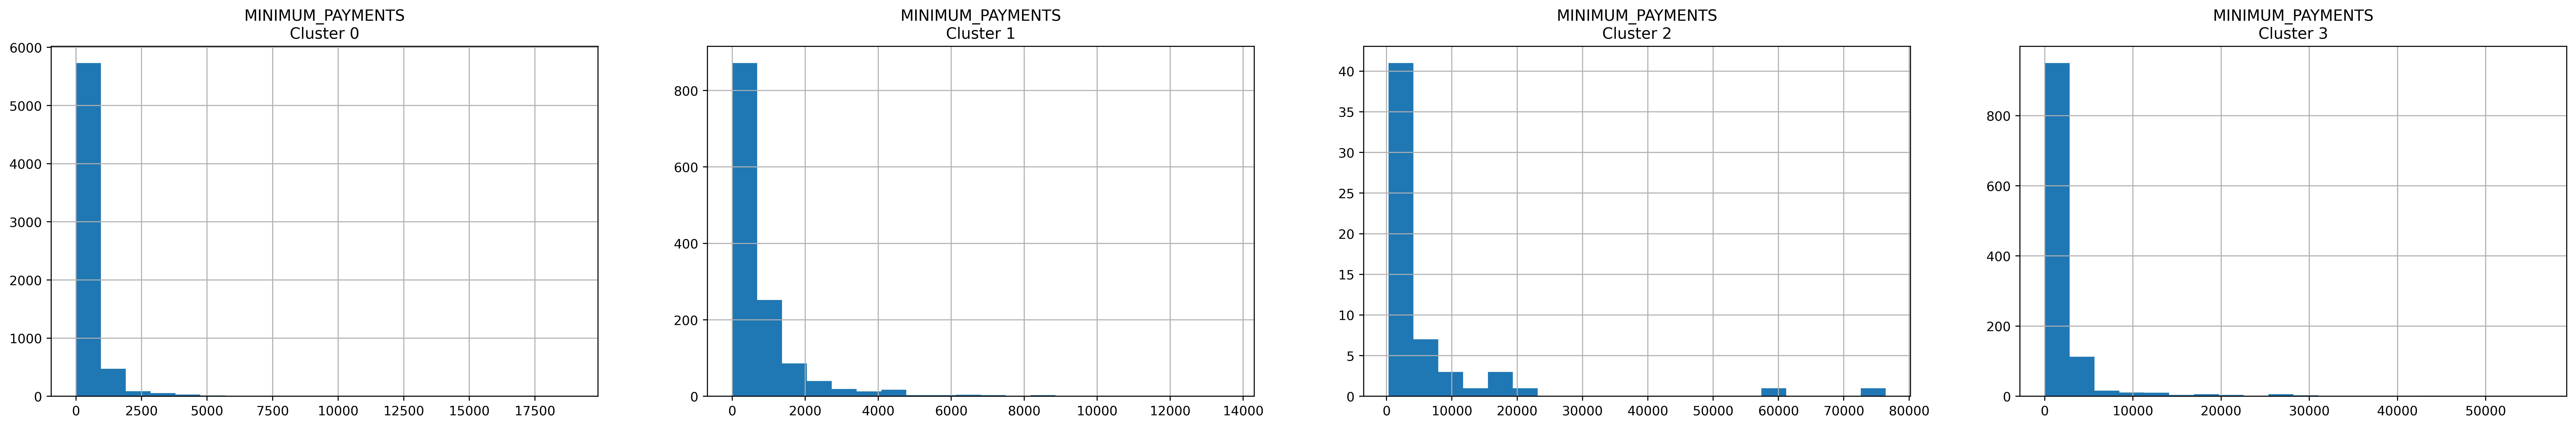

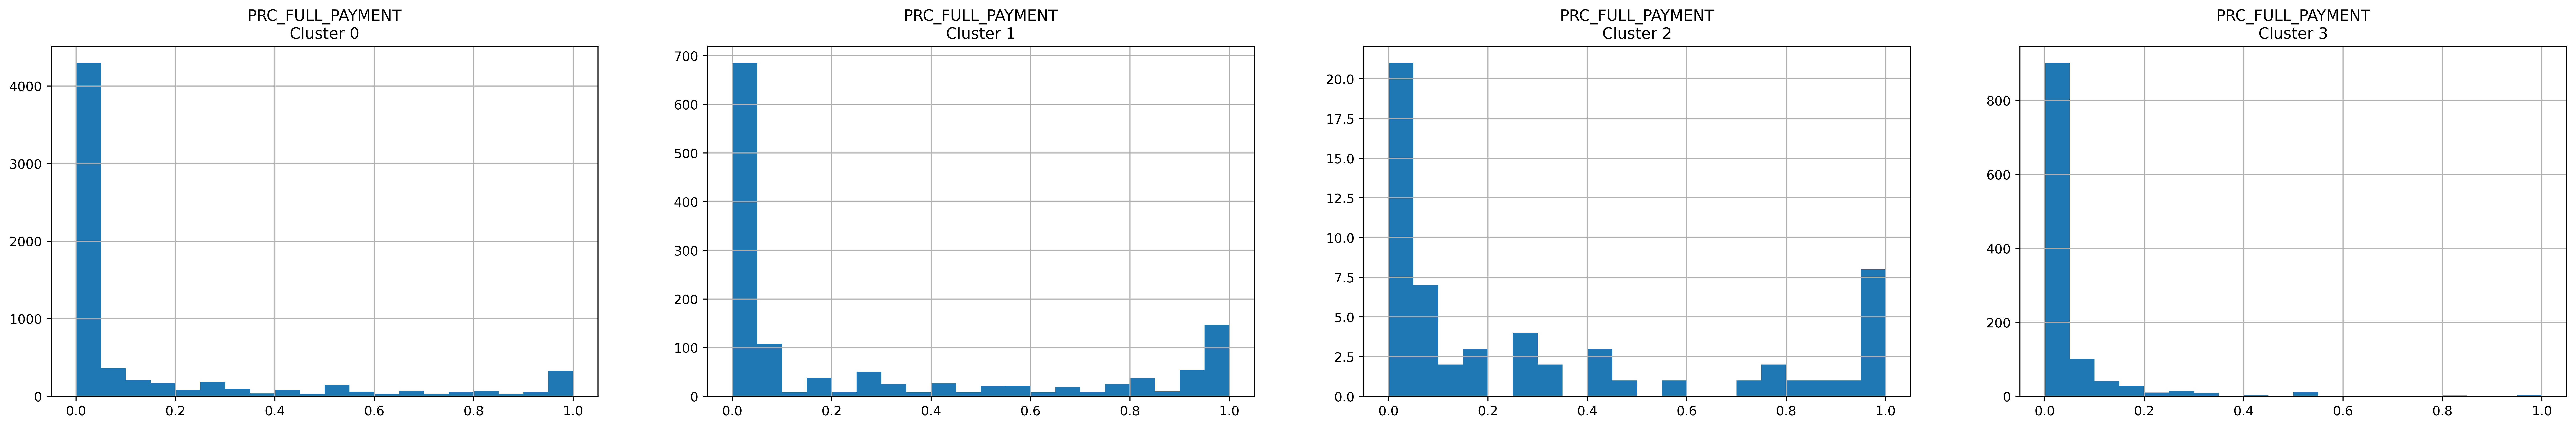

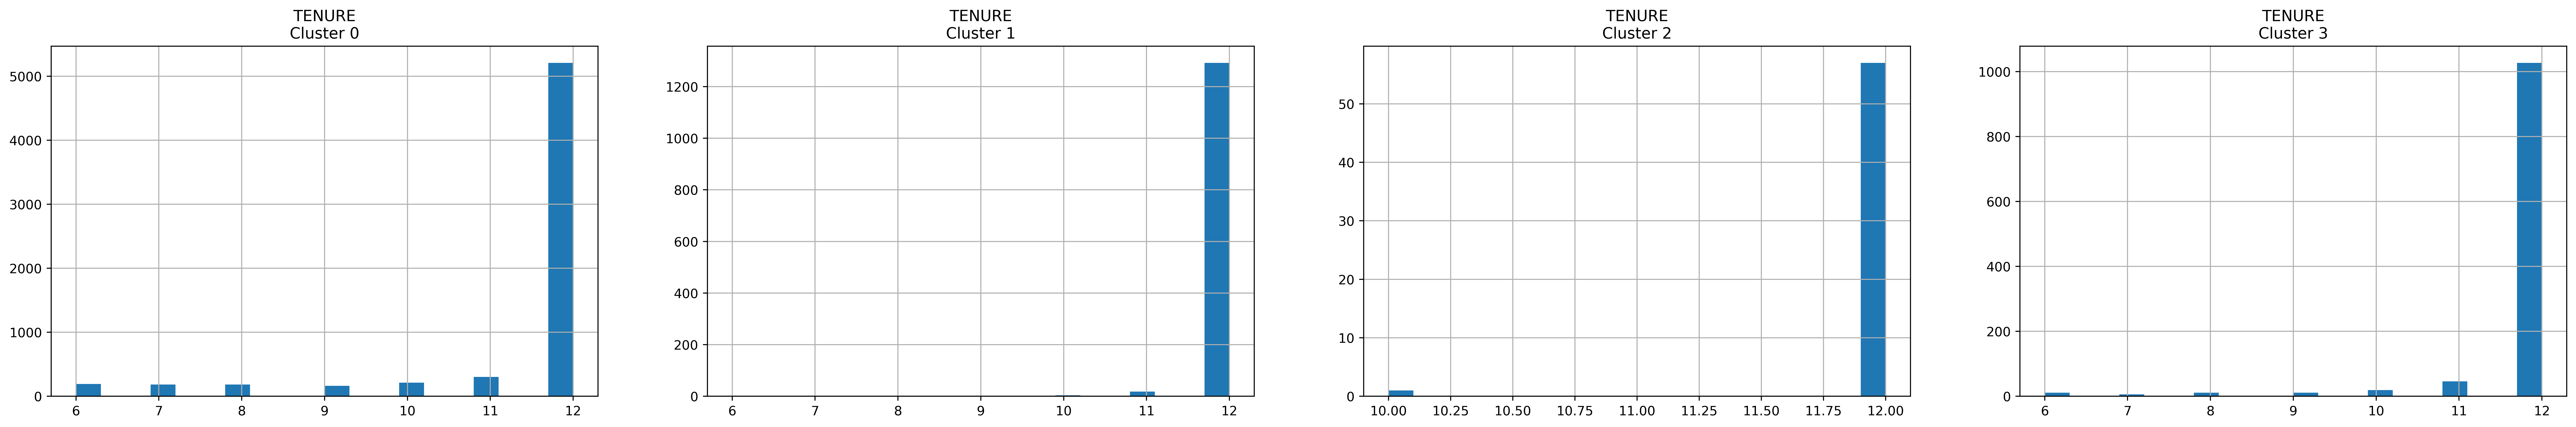

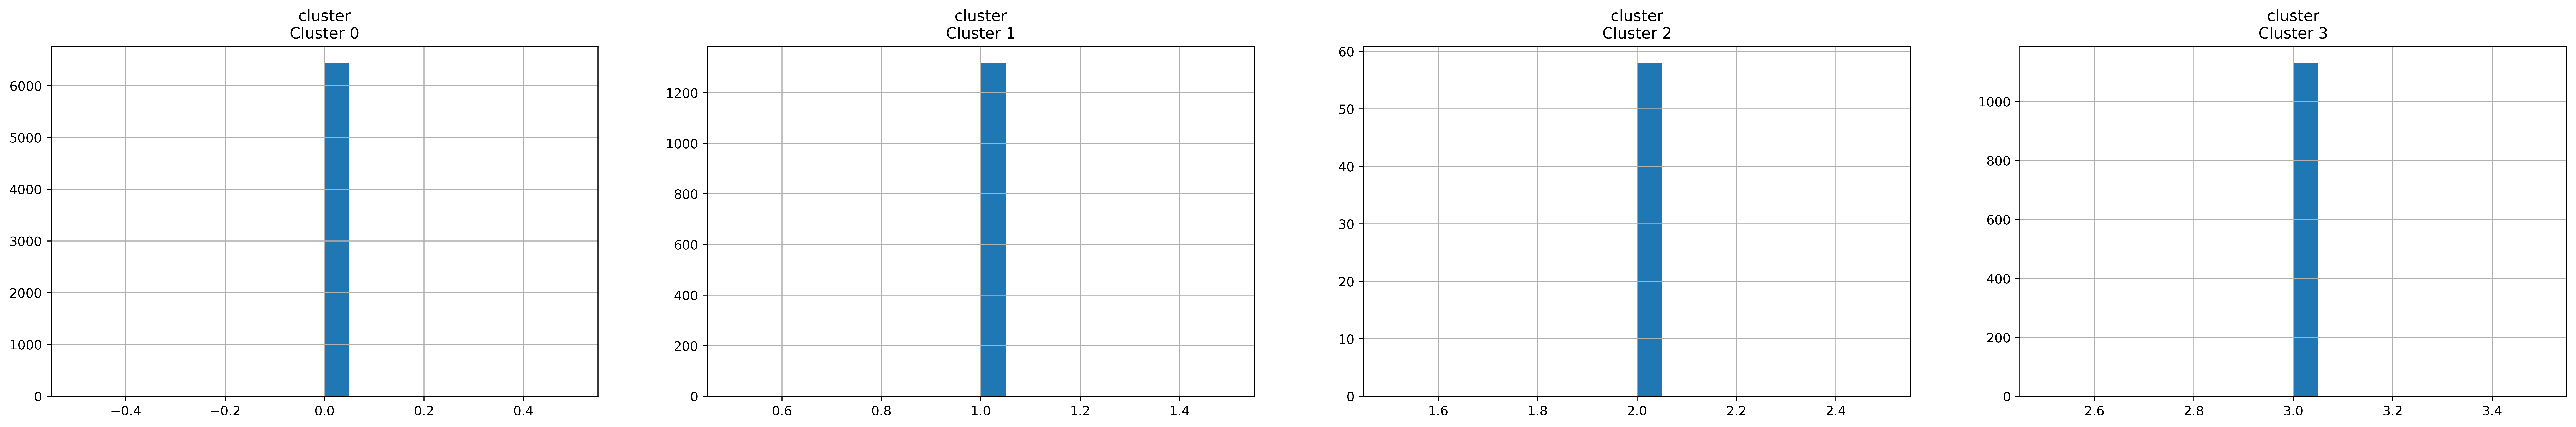

In [46]:
#--each row of figures represents feature distribution for each cluster-----#
for i in df_cluster_dr.columns:
    plt.figure(figsize = (35, 5), dpi = 500)
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = df_cluster_dr[ df_cluster_dr['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

**visualize 5 key features**

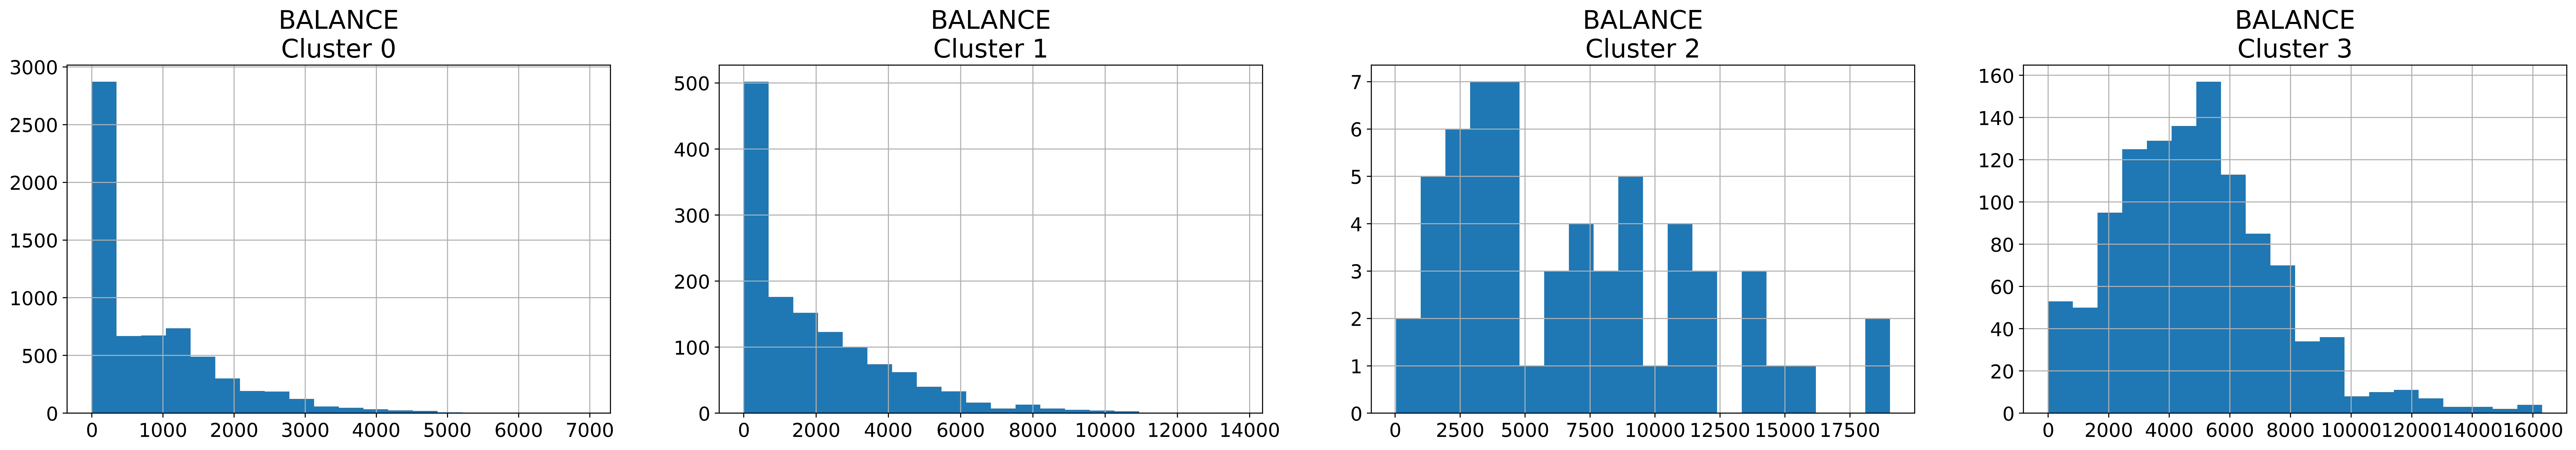

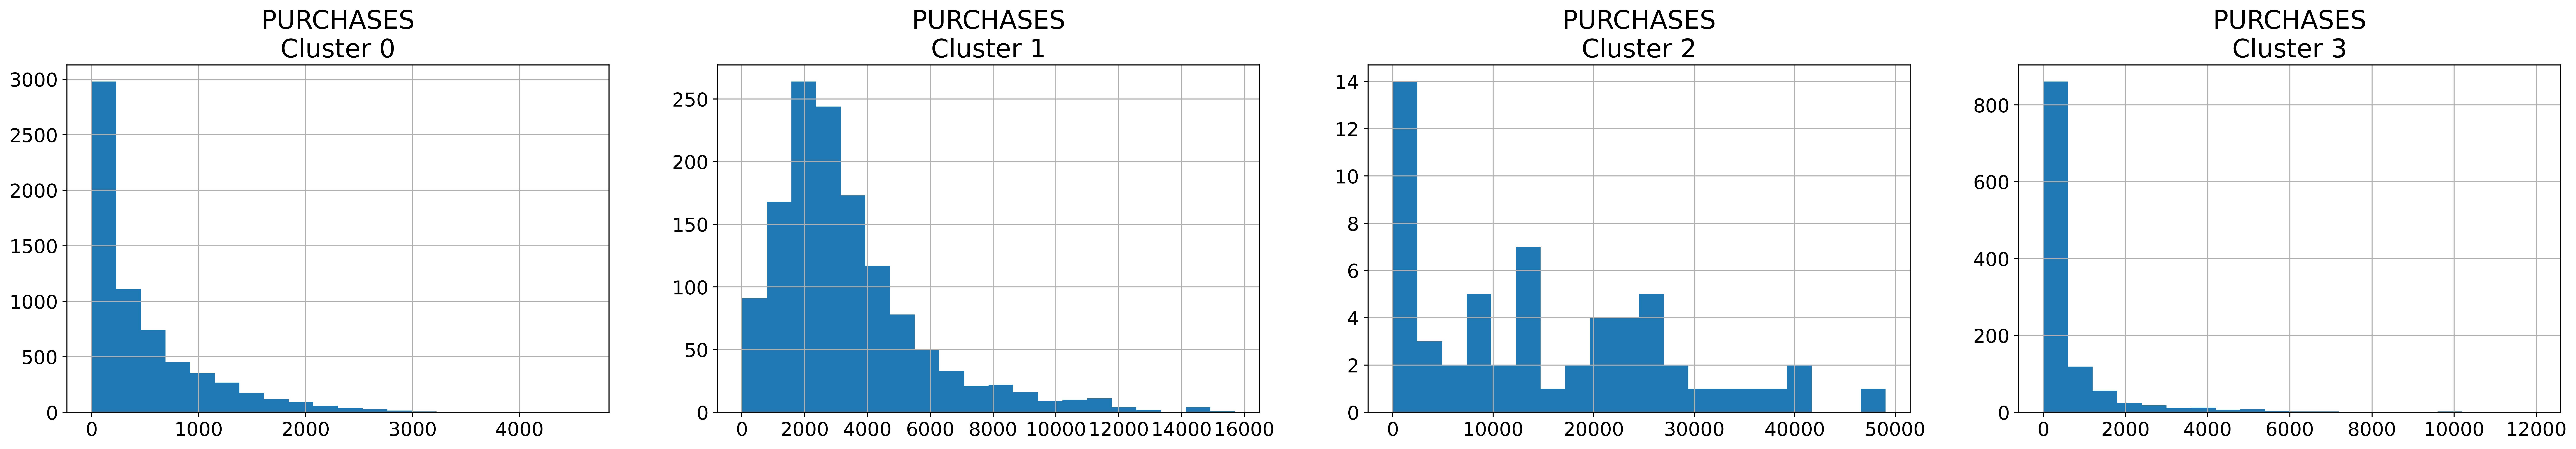

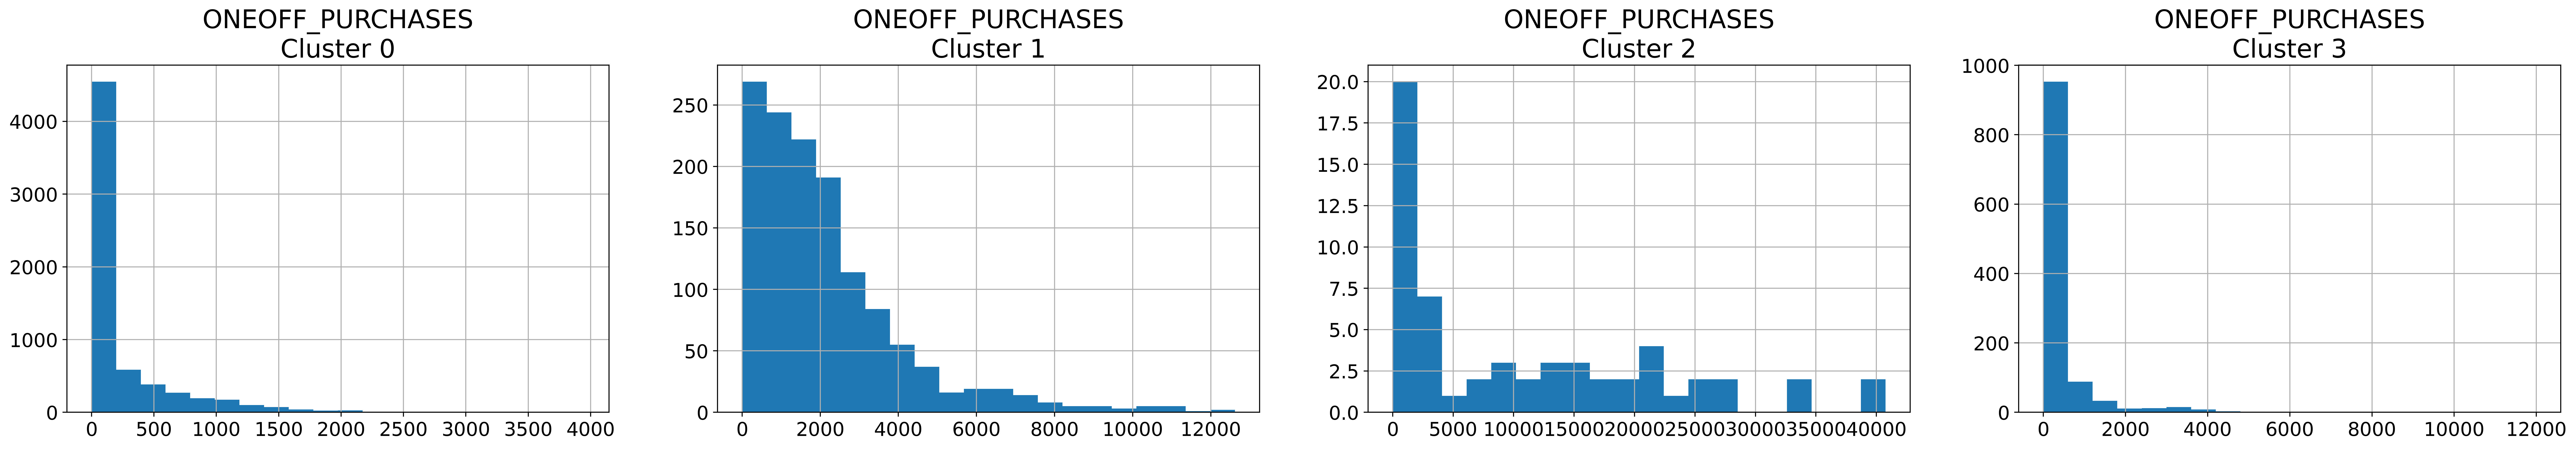

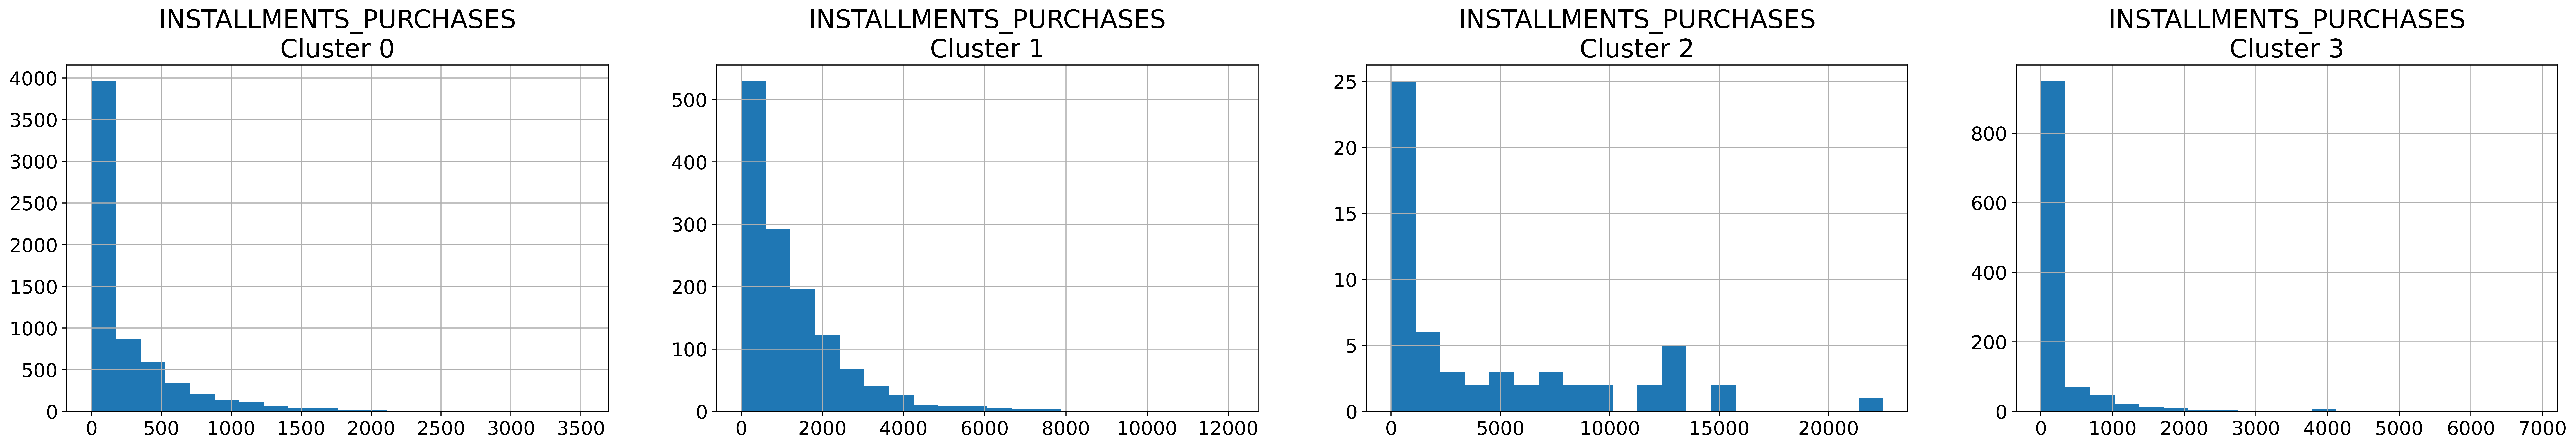

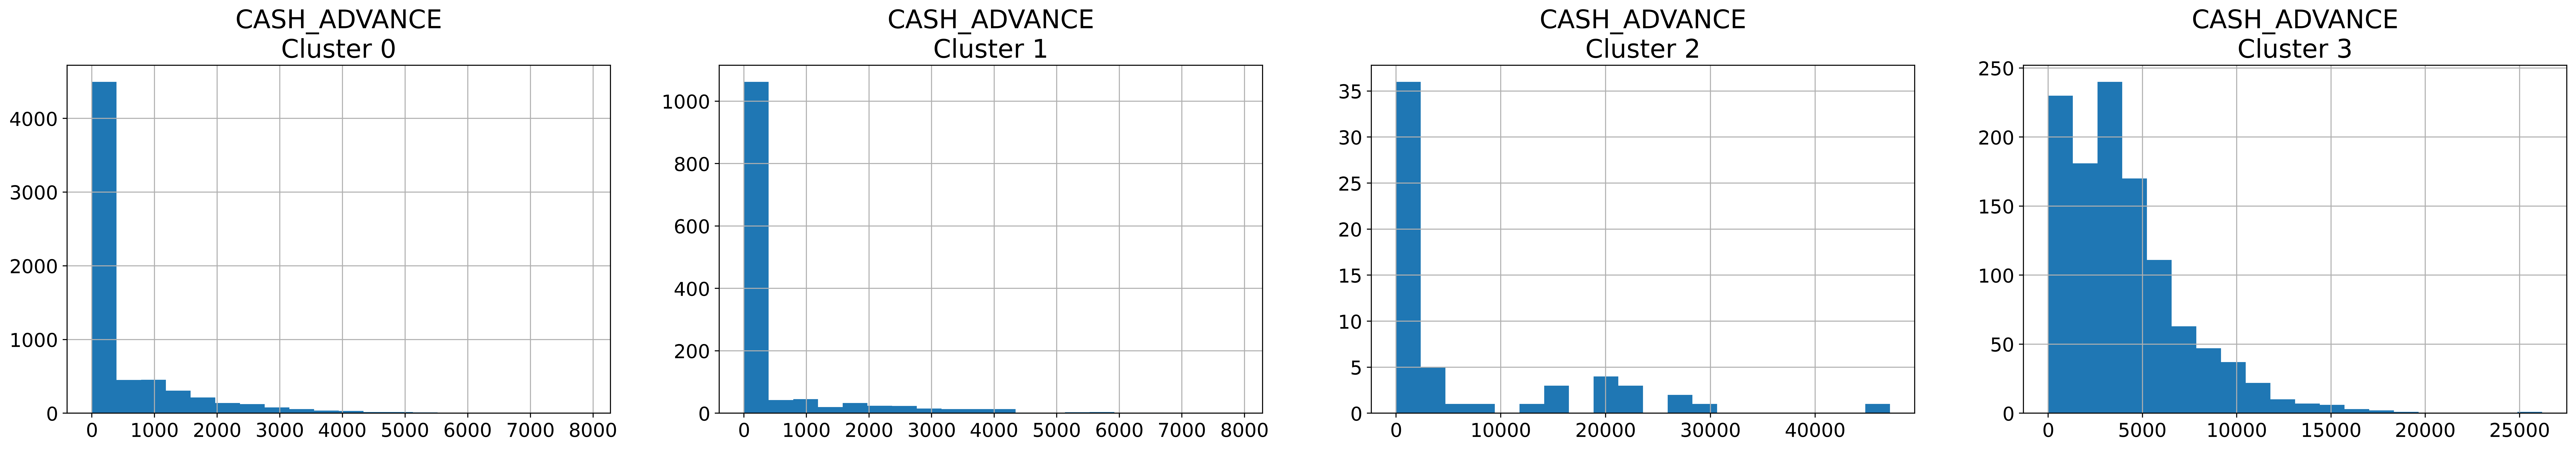

In [47]:
col_interest = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']
for i in df_cluster_dr.columns:
    if i not in col_interest: 
        continue
    plt.figure(figsize = (35, 5), dpi = 500)
    for j in range(4):
        ax = plt.subplot(1, 4, j+1)
        cluster = df_cluster_dr[ df_cluster_dr['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j), fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize = 15)
plt.show()

**5.4.5 apply PCA**

In [48]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])

In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.129413 -0.511433        0
1  3.005934 -2.054306        3
2  0.255318  0.800398        1
3  0.375597 -0.439803        0
4 -0.568667 -0.654423        0

Text(0, 0.5, 'pca2')

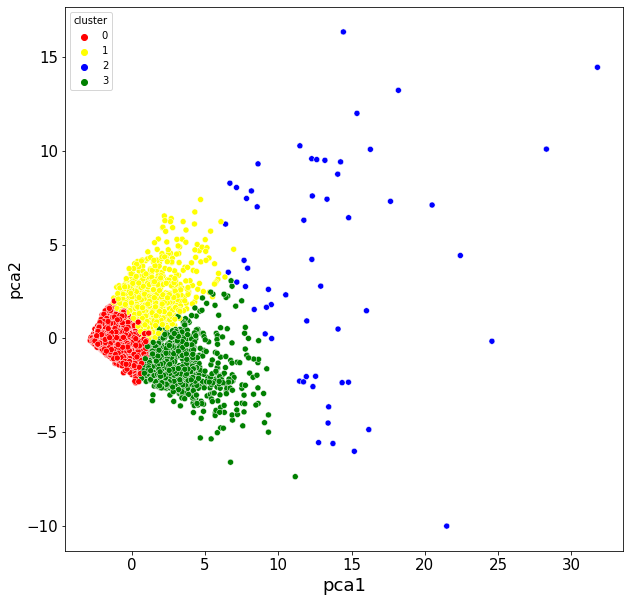

In [50]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'yellow', 'blue', 'green' ], )
ax.tick_params(axis='both', which='major', labelsize = 15)
plt.xlabel('pca1', fontsize=18)
plt.ylabel('pca2', fontsize=16)